# This is a sample Jupyter Notebook

Below is an example of a code cell.
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
import io
import zipfile

import pandas as pd
import requests

# URL for the ZIP file
zip_url = "https://www.kaggle.com/api/v1/datasets/download/taeefnajib/used-car-price-prediction-dataset"

# Send a GET request to download the ZIP file
response = requests.get(zip_url)

# Create a BytesIO object from the response content (acts as a file-like object)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# List the files inside the ZIP
csv_file_name = zip_file.namelist()[0]  # Choose the first file if there are multiple

# Read the CSV file into a DataFrame
used_cars_data = pd.read_csv(zip_file.open(csv_file_name))
# Now `used_cars_data` is a DataFrame containing the data

In [2]:


# Rename column 'milage' to 'mileage'
used_cars_data.rename(columns={'milage': 'mileage'}, inplace=True)

# Remove dollar signs, commas, and convert string to integer for 'price'
used_cars_data['price'] = used_cars_data['price'].replace({'[$,]': ''}, regex=True).astype(int)

# Remove commas, " mi" text and convert string to integer for 'milage'
used_cars_data['mileage'] = used_cars_data['mileage'].replace({'[., mi]': ''}, regex=True).astype(int)

# Replace missing values in 'fuel_type' with "electric"
used_cars_data['fuel_type'] = used_cars_data['fuel_type'].fillna('electric')

newest_car = used_cars_data['model_year'].max() + 1
used_cars_data['age'] = newest_car - used_cars_data['model_year']

In [3]:


# Convert columns to categorical type
# used_cars_data['model'] = used_cars_data['model'].astype('category')
# used_cars_data['fuel_type'] = used_cars_data['fuel_type'].astype('category')
# used_cars_data['engine'] = used_cars_data['engine'].astype('category')
# used_cars_data['transmission'] = used_cars_data['transmission'].astype('category')
# used_cars_data['ext_col'] = used_cars_data['ext_col'].astype('category')
# used_cars_data['int_col'] = used_cars_data['int_col'].astype('category')
# used_cars_data['accident'] = used_cars_data['accident'].astype('category')
# used_cars_data['clean_title'] = used_cars_data['clean_title'].astype('category')

In [4]:
used_cars_data.isna().sum()

brand             0
model             0
model_year        0
mileage           0
fuel_type         0
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
age               0
dtype: int64

In [5]:
used_cars_data.duplicated().sum()

np.int64(0)

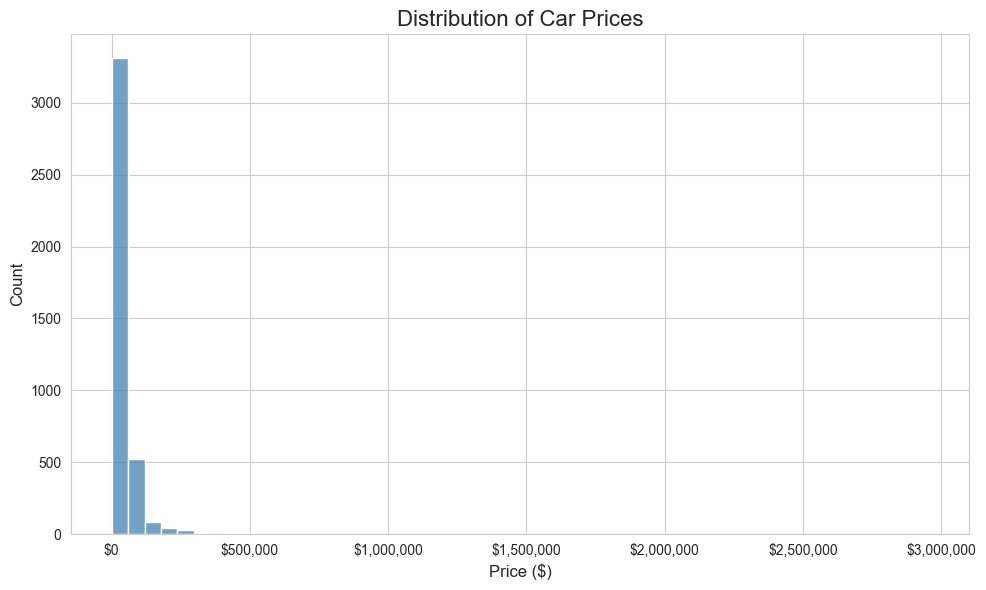

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set up the plot
# figure_no = 1
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(used_cars_data['price'], bins=50, color='steelblue', kde=False)

# Set the x-axis format to add commas to the labels
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"${x:,.0f}"))

# Add labels and title
plt.title("Distribution of Car Prices", fontsize=16, ha='center')
plt.xlabel("Price ($)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add caption
# plt.figtext(0.5, -0.1, f"Figure {figure_no}: Histogram showing the distribution of used car prices with 50 bins.",
#             ha='center', fontsize=10, style='italic')

# Show minimal theme (using seaborn's default style)
sns.set_style("whitegrid")

# Show the plot
plt.tight_layout()
plt.show()

In [33]:
used_cars_data['price'].describe()

count    4.009000e+03
mean     4.455319e+04
std      7.871064e+04
min      2.000000e+03
25%      1.720000e+04
50%      3.100000e+04
75%      4.999000e+04
max      2.954083e+06
Name: price, dtype: float64

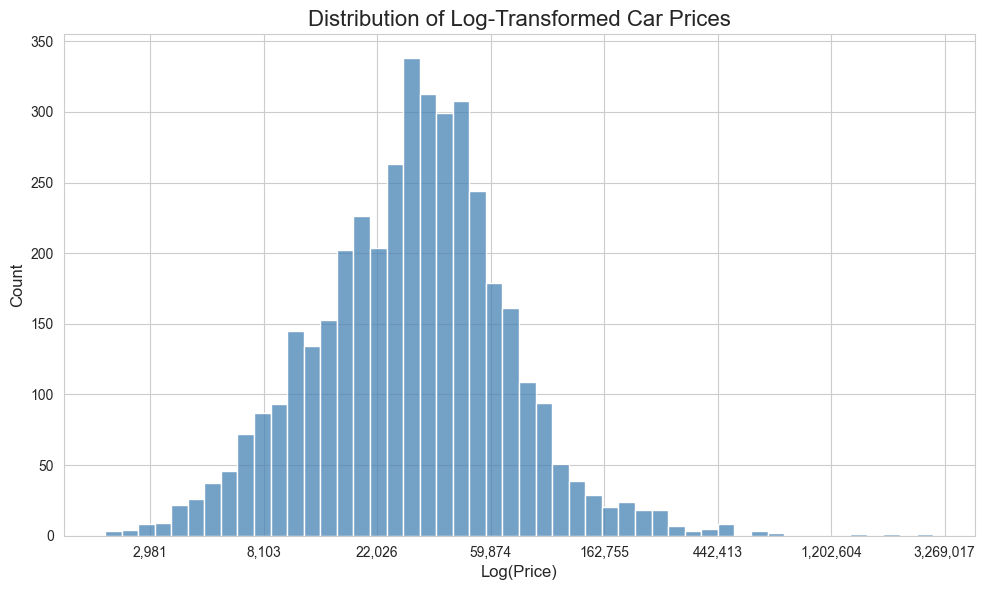

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

# Increment the figure number
# figure_no = 2  # Assuming the previous figure_no was 1

# Set up the plot
plt.figure(figsize=(10, 6))

# Apply log transformation to the price column and plot the histogram
sns.histplot(np.log(used_cars_data['price']), bins=50, color='steelblue', kde=False)

# Set the x-axis format to add commas to the labels (for log-transformed data)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{np.exp(x):,.0f}"))

# Add labels and title
plt.title("Distribution of Log-Transformed Car Prices", fontsize=16, ha='center')
plt.xlabel("Log(Price)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add caption
# plt.figtext(0.5, -0.1, f"Figure {figure_no}: Log transformation applied to price values to better visualize the distribution pattern.",
#             ha='center', fontsize=10, style='italic')

# Show minimal theme (using seaborn's default style)
sns.set_style("whitegrid")

# Show the plot
plt.tight_layout()
plt.show()

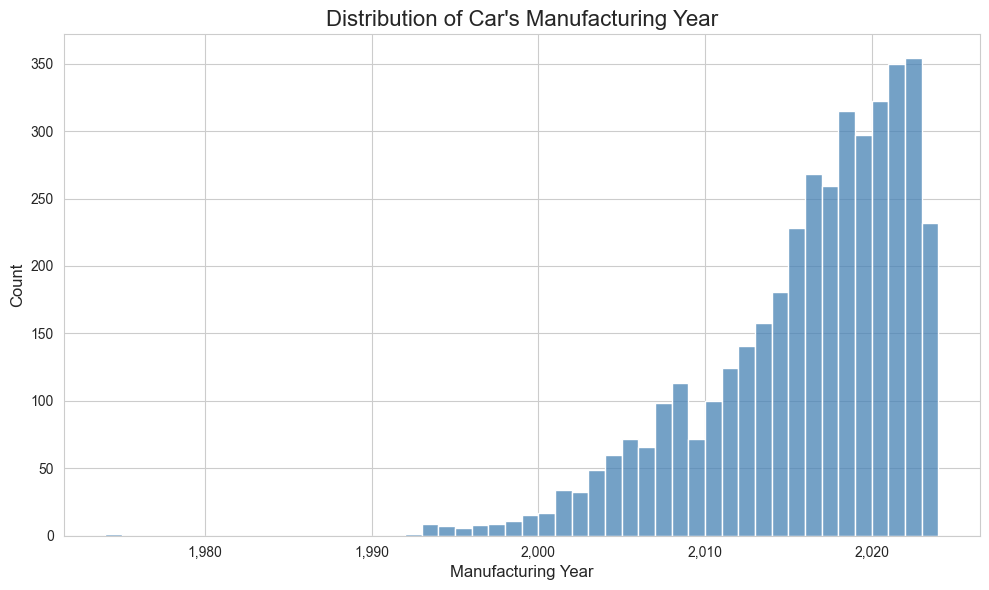

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Increment the figure number
# figure_no = 3  # Assuming the previous figure_no was 2

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the histogram for 'model_year'
sns.histplot(used_cars_data['model_year'], bins=50, color='steelblue', kde=False)

# Set the x-axis format to add commas to the labels
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))

# Add labels and title
plt.title("Distribution of Car's Manufacturing Year", fontsize=16, ha='center')
plt.xlabel("Manufacturing Year", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add caption
# plt.figtext(0.5, -0.1, f"Figure {figure_no}: Histogram showing the distribution of used car manufacturing year with 50 bins.",
#             ha='center', fontsize=10, style='italic')

# Show minimal theme (using seaborn's default style)
sns.set_style("whitegrid")

# Show the plot
plt.tight_layout()
plt.show()

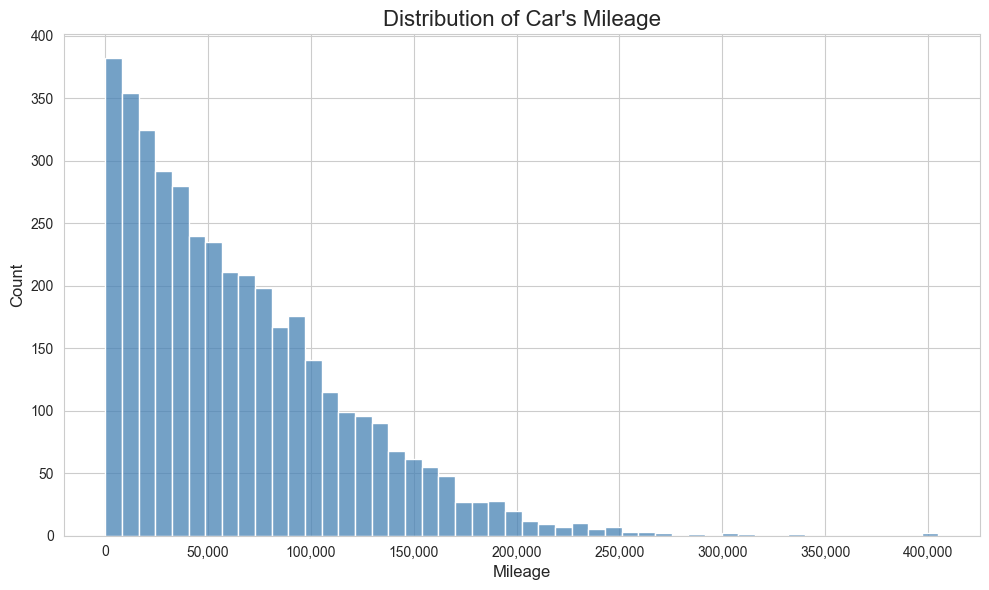

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Increment the figure number
# figure_no = 4  # Assuming the previous figure_no was 3

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the histogram for 'mileage'
sns.histplot(used_cars_data['mileage'], bins=50, color='steelblue', kde=False)

# Set the x-axis format to add commas to the labels
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))

# Add labels and title
plt.title("Distribution of Car's Mileage", fontsize=16, ha='center')
plt.xlabel("Mileage", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add caption
# plt.figtext(0.5, -0.1, f"Figure {figure_no}: Histogram showing the distribution of used car mileage with 50 bins.",
#             ha='center', fontsize=10, style='italic')

# Show minimal theme (using seaborn's default style)
sns.set_style("whitegrid")

# Show the plot
plt.tight_layout()
plt.show()

In [10]:



def plot_categorical_var(data, var_name, figure_no, max_categories=25):
    # Increment figure number
    # figure_no += 1

    # Get top N categories if there are too many
    if len(data[var_name].unique()) > max_categories:
        top_cats = data[var_name].value_counts().nlargest(max_categories).index
        data['temp_var'] = data[var_name].apply(lambda x: x if x in top_cats else 'Other')
        plot_data = data['temp_var'].value_counts().reset_index()
        plot_data.columns = [var_name, 'n']

        # Create caption for plots with "Other" category
        # caption_text = f"Figure {figure_no}: Showing top {max_categories} categories of {var_name}. All remaining categories grouped as 'Other'."
    else:
        plot_data = data[var_name].value_counts().reset_index()
        plot_data.columns = [var_name, 'n']

        # Create caption for plots with all categories shown
        # caption_text = f"Figure {figure_no}: Distribution of all {len(data[var_name].unique())} categories."

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=var_name, y='n', data=plot_data, color='seagreen')  # Using 'color' instead of 'palette'

    # Add labels and title
    plt.title(f"Count of Cars by {var_name}", fontsize=16, ha='center')
    plt.xlabel(var_name, fontsize=12)
    plt.ylabel("Count", fontsize=12)

    # Rotate x-axis labels if necessary
    plt.xticks(rotation=45, ha='right')

    # Add caption
    # plt.figtext(0.5, -0.1, caption_text, ha='center', fontsize=10, style='italic')

    # Show minimal theme (seaborn default style)
    sns.set_style("whitegrid")

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Return updated figure number
    return figure_no


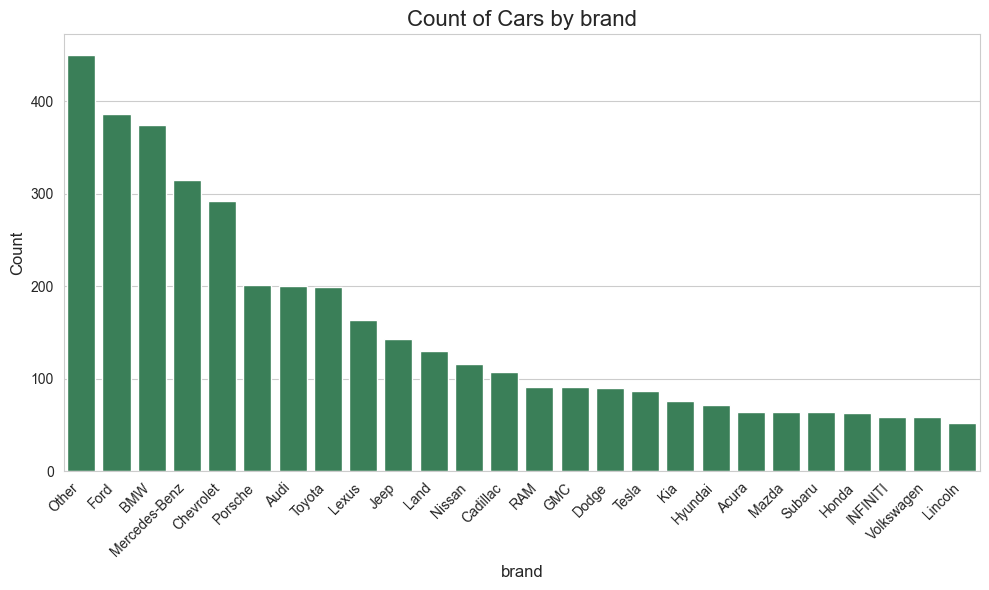

0

In [11]:
plot_categorical_var(used_cars_data, "brand", 0)

In [12]:
# List of luxury brands
luxury_brands = ["Acura", "Alfa", "Aston", "Audi", "Bentley", "BMW", "Bugatti",
                 "Ferrari", "INFINITI", "Jaguar", "Lamborghini", "Land", "Lexus", "Maserati",
                 "McLaren", "Mercedes-Benz", "Porsche", "Rolls-Royce", "Tesla", "Volvo"]

# Create the new feature 'luxury_brand' where 1 means the brand is luxury, else 0
used_cars_data['luxury_brand'] = used_cars_data['brand'].apply(lambda x: 1 if x in luxury_brands else 0)

# Convert 'luxury_brand' to categorical (i.e., 'factor' in R)
used_cars_data['luxury_brand'] = used_cars_data['luxury_brand'].astype('category')

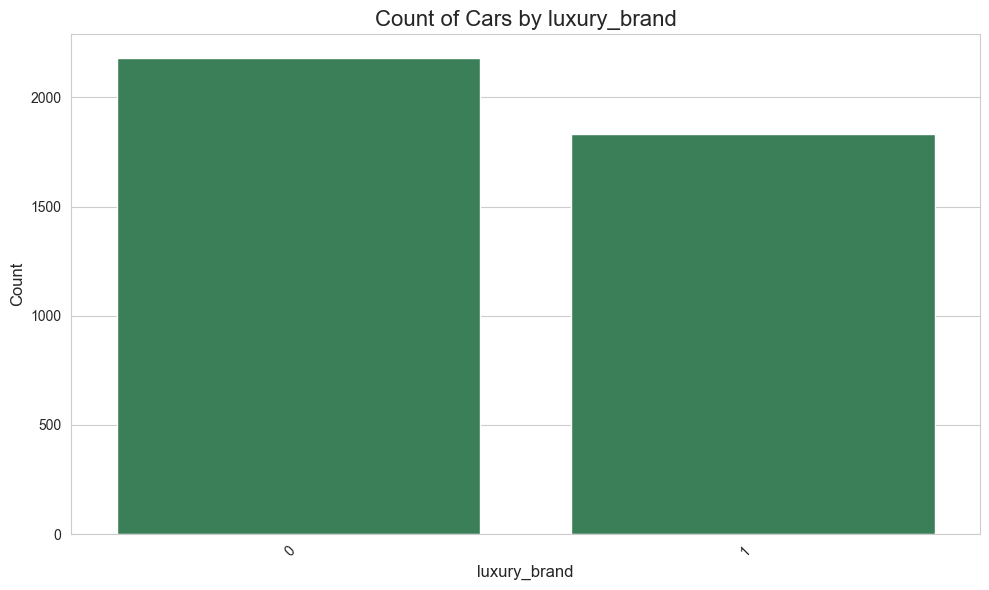

0

In [13]:
 plot_categorical_var(used_cars_data, "luxury_brand", 0)

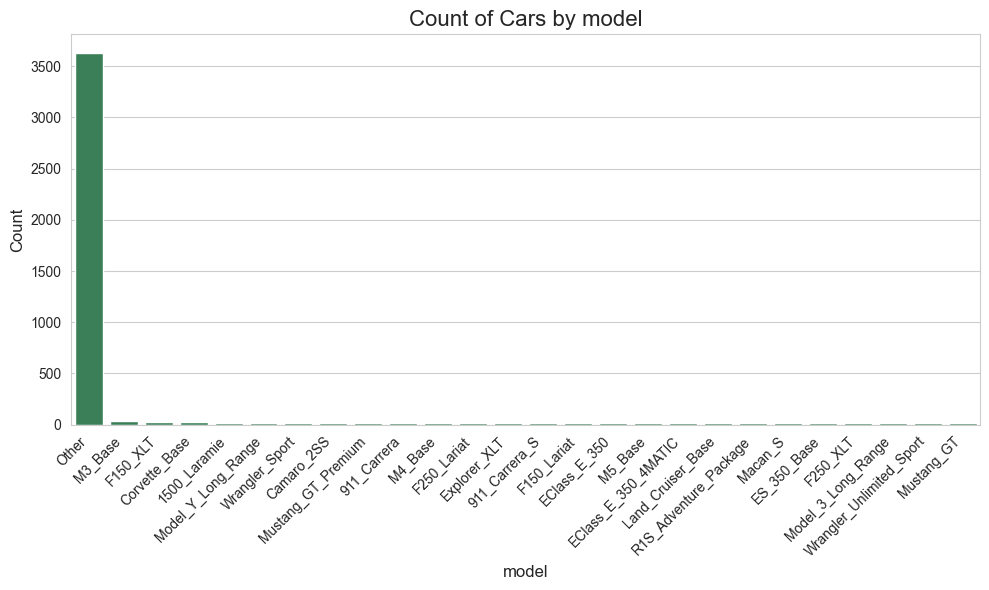

0

In [14]:
# Replace whitespace with underscores and remove hyphens in 'fuel_type' column
used_cars_data['model'] = used_cars_data['model'].str.replace(' ', '_', regex=False).str.replace('-', '', regex=False)
plot_categorical_var(used_cars_data, "model", 0)

In [15]:
used_cars_data['model'].value_counts()

model
M3_Base             30
F150_XLT            24
Corvette_Base       22
1500_Laramie        18
Camaro_2SS          17
                    ..
Mazda6_Signature     1
SLKClass_SLK320      1
Protege_DX           1
Q5_40_Premium        1
Passat_2.5_SE        1
Name: count, Length: 1898, dtype: int64

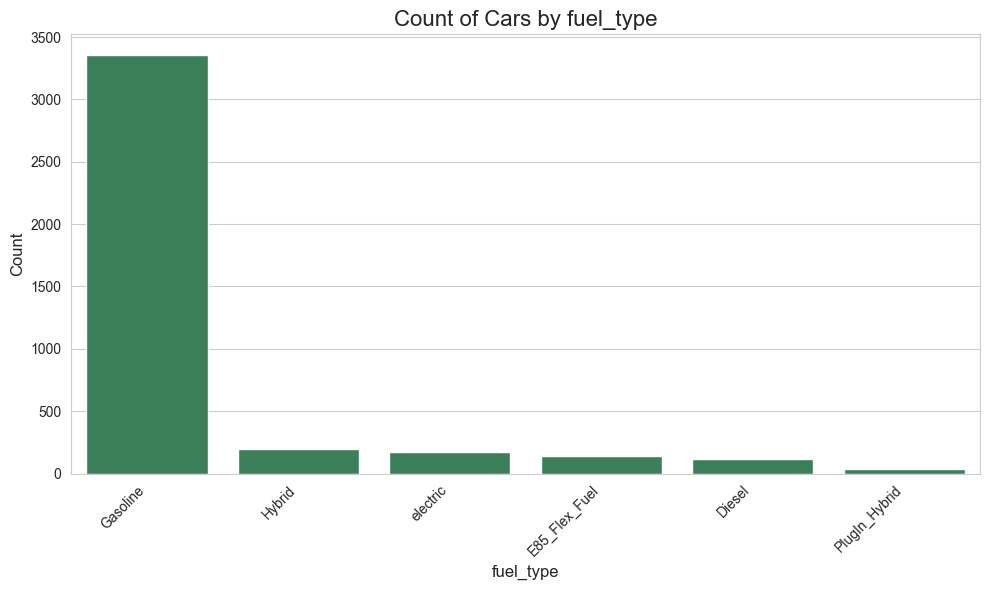

0

In [16]:
used_cars_data.loc[used_cars_data['fuel_type'] == 'not supported', 'fuel_type'] = 'electric'
used_cars_data.loc[used_cars_data['fuel_type'] == '–', 'fuel_type'] = 'Gasoline'

# Replace whitespace with underscores and remove hyphens in 'fuel_type' column
used_cars_data['fuel_type'] = used_cars_data['fuel_type'].str.replace(' ', '_', regex=False).str.replace('-', '',
                                                                                                         regex=False)

plot_categorical_var(used_cars_data, "fuel_type", 0)

In [17]:
used_cars_data['fuel_type'].value_counts()

fuel_type
Gasoline         3354
Hybrid            194
electric          172
E85_Flex_Fuel     139
Diesel            116
PlugIn_Hybrid      34
Name: count, dtype: int64

In [18]:
used_cars_data[used_cars_data['fuel_type'] == 'E85 Flex Fuel']

,brand,model,model_year,mileage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,age,temp_var,luxury_brand


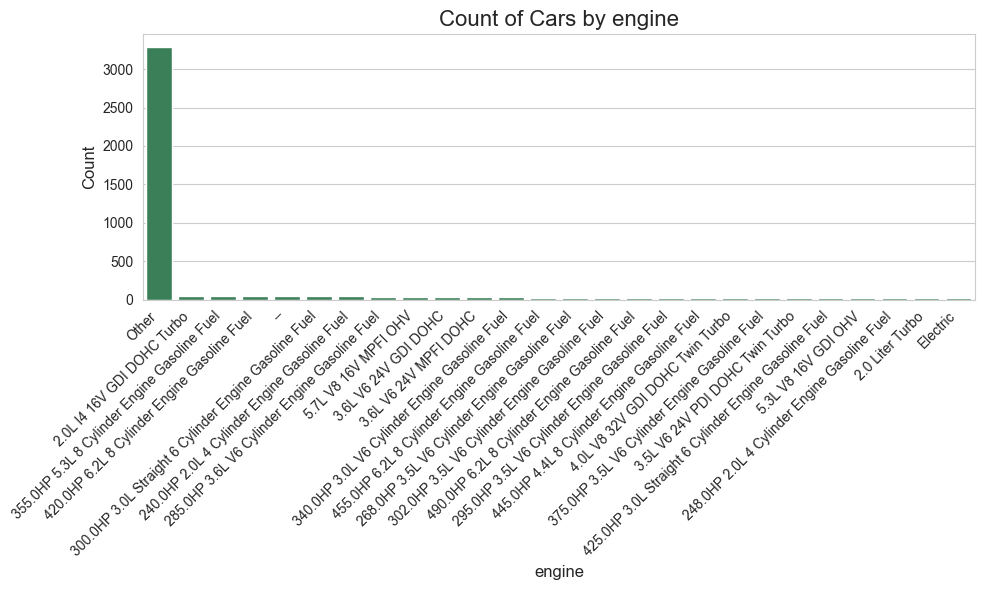

0

In [19]:
plot_categorical_var(used_cars_data, "engine", 0)

In [20]:
import re


# Function to extract engine size
def extract_engine_size(engine):
    match = re.search(r"([0-9]+\.[0-9]+)\s{0,1}L", engine)
    if match:
        return float(match.group(1))  # Extract the number as a float
    else:
        return np.nan  # Return NaN if no match


# Apply the function to the 'engine' column
used_cars_data['engine_size'] = used_cars_data['engine'].apply(extract_engine_size)

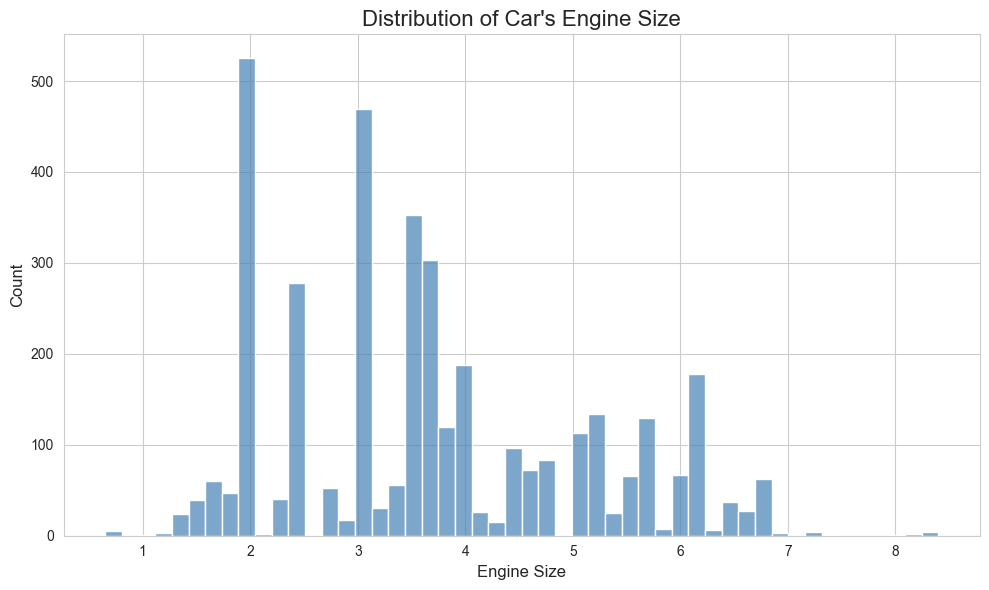

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increment the figure number
# figure_no += 1

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(used_cars_data['engine_size'], bins=50, color='steelblue', kde=False, alpha=0.7)

# Add labels and title
plt.title(f"Distribution of Car's Engine Size", fontsize=16, ha='center')
plt.xlabel("Engine Size", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add caption
# caption_text = f"Figure {figure_no}: Histogram showing the distribution of used car engine size with 50 bins."
# plt.figtext(0.5, -0.1, caption_text, ha='center', fontsize=10, style='italic')

# Apply minimal theme
sns.set_style("whitegrid")

# Show the plot
plt.tight_layout()
plt.show()

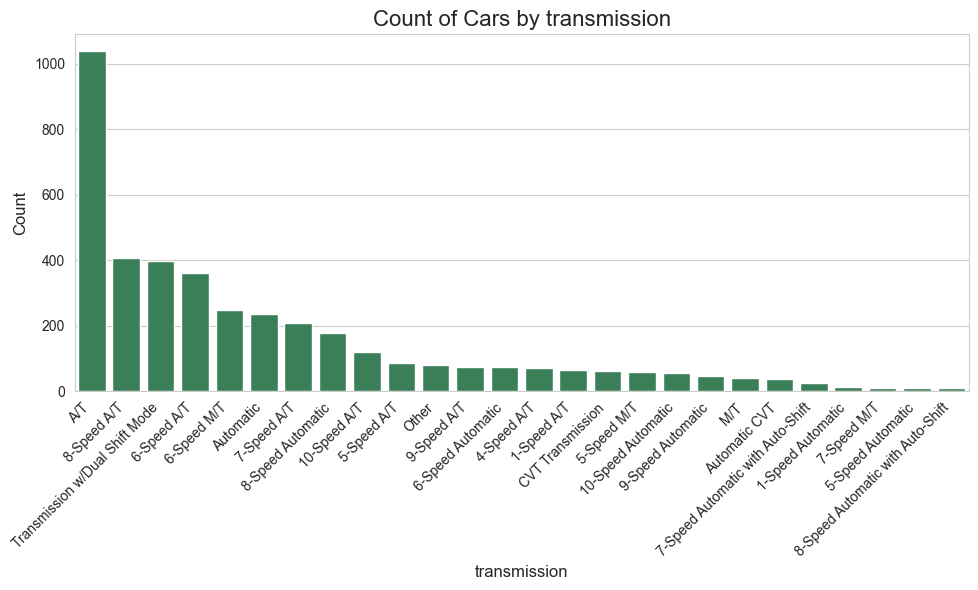

0

In [22]:
plot_categorical_var(used_cars_data, "transmission", 0)

In [23]:



# Define a function to check if transmission is automatic
def is_automatic_transmission(transmission):
    # List of keywords indicating automatic transmission
    automatic_keywords = ["A/T", "Automatic", "CVT", "–", "Transmission w/Dual Shift Mode", "Auto", "Overdrive", "AT",
                          "6 Speed At"]
    # Return 1 if any keyword matches, else 0
    return 1 if any(keyword in transmission for keyword in automatic_keywords) else 0


# Apply the function to create the 'automatic_transmission' column
used_cars_data['automatic_transmission'] = used_cars_data['transmission'].apply(is_automatic_transmission)

# Convert 'automatic_transmission' to categorical (similar to 'factor' in R)
used_cars_data['automatic_transmission'] = used_cars_data['automatic_transmission'].astype('category')

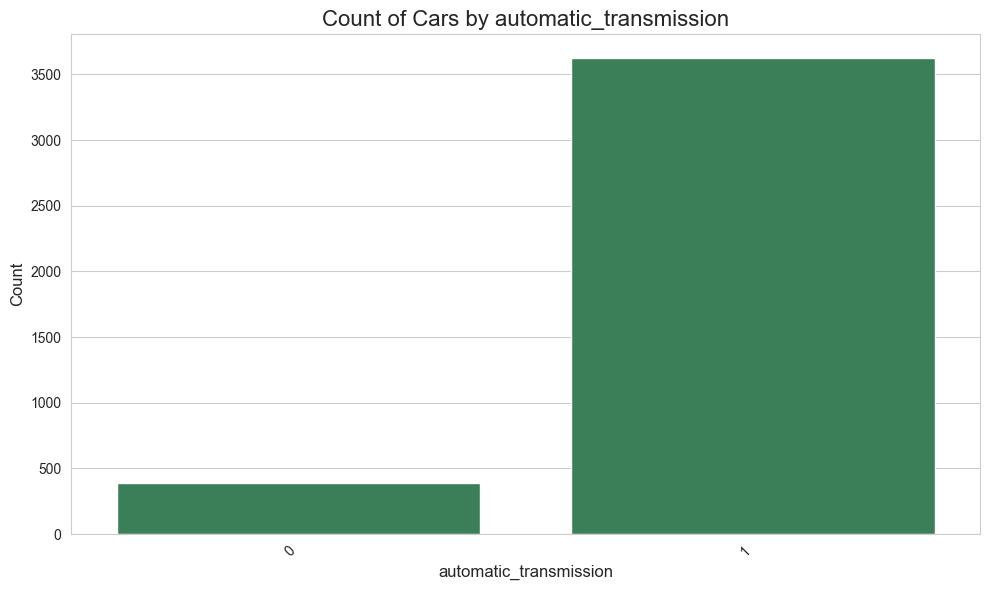

0

In [24]:
plot_categorical_var(used_cars_data, "automatic_transmission", 0)

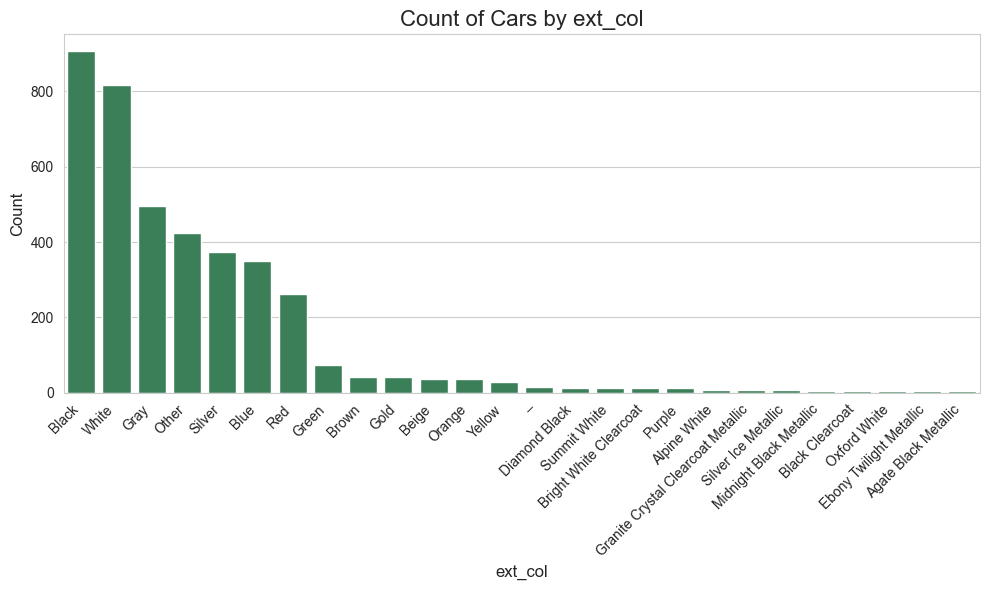

0

In [25]:
plot_categorical_var(used_cars_data, "ext_col", 0)

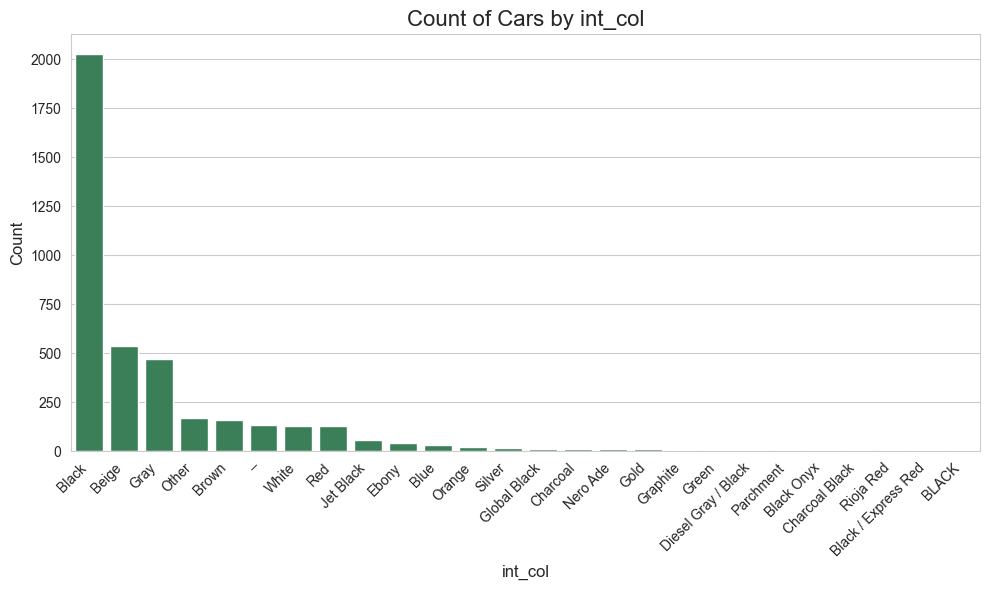

0

In [26]:
plot_categorical_var(used_cars_data, "int_col", 0)

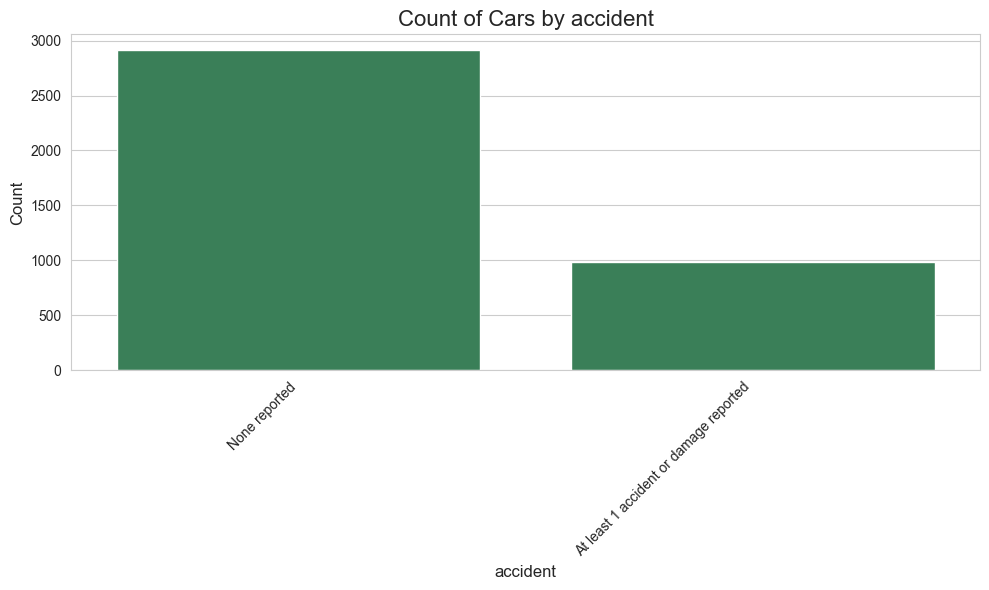

0

In [27]:
plot_categorical_var(used_cars_data, "accident", 0)

In [28]:
used_cars_data['accident'] = used_cars_data['accident'].apply(lambda x: 0 if x == 'None reported' else 1)

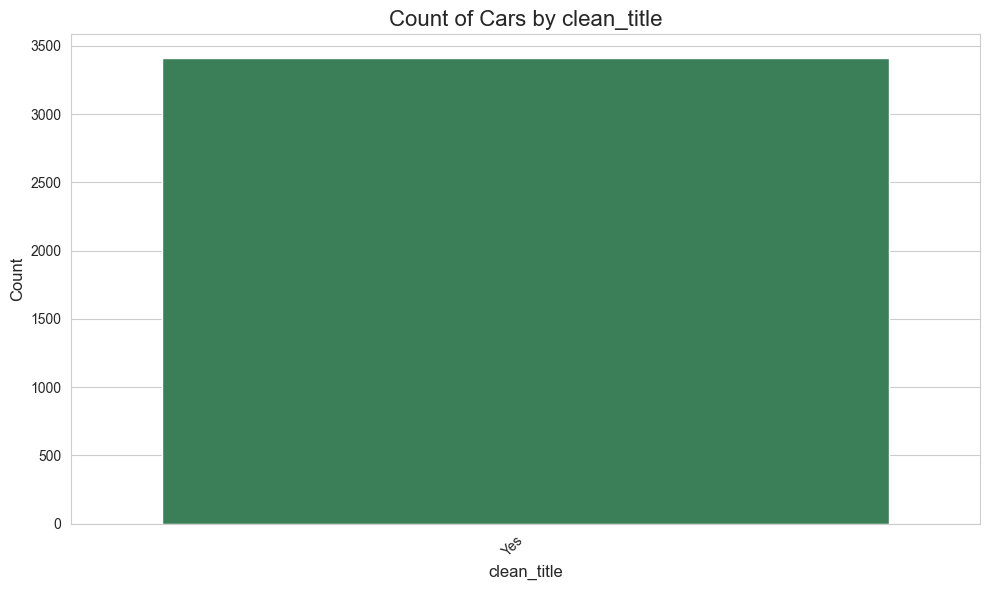

0

In [29]:
plot_categorical_var(used_cars_data, "clean_title", 0)

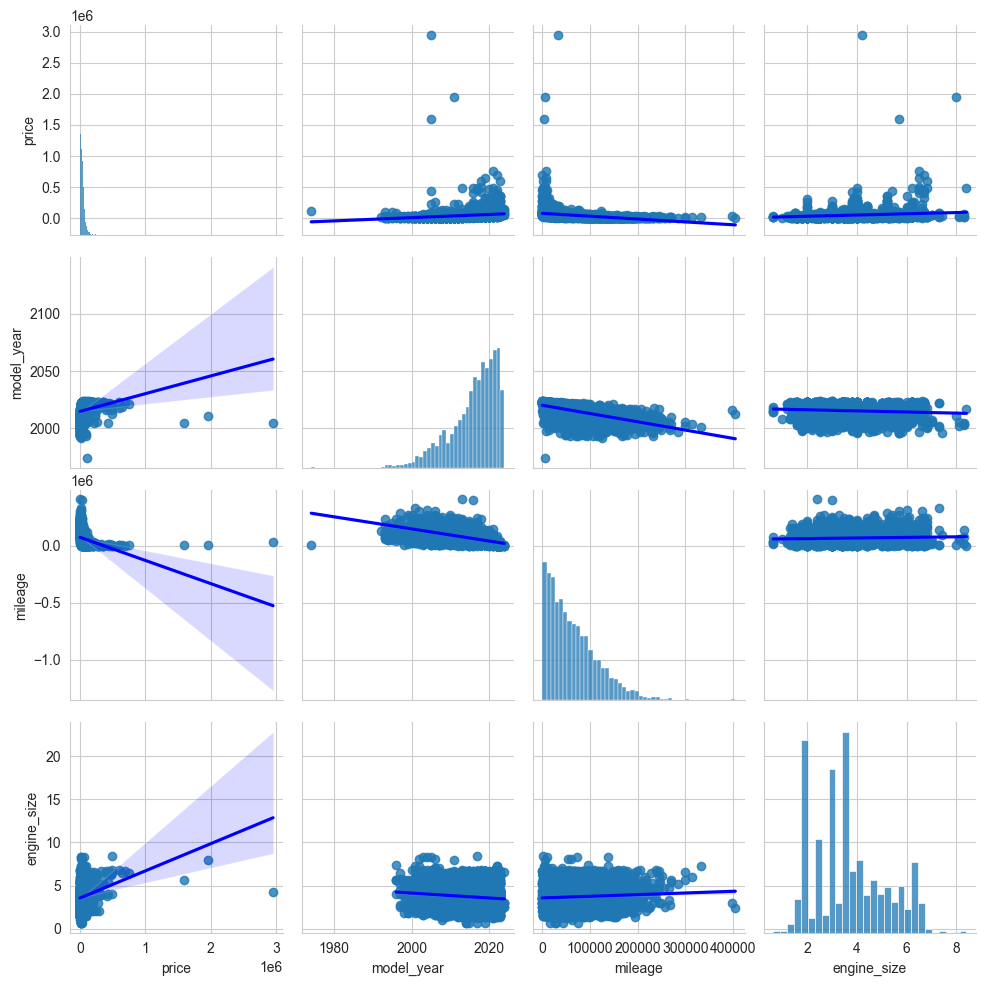

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for the pairplot
used_cars_data_subset = used_cars_data[['price', 'model_year', 'mileage', 'engine_size']]

# Create the pairplot with smooth plotting (similar to panel.smooth in R)
sns.pairplot(used_cars_data_subset, kind='reg', plot_kws={'line_kws': {'color': 'blue'}})

# Show the plot
plt.show()

In [31]:
# used_cars_data.drop(columns=['temp_var','brand','model_year','engine','transmission','engine_size','ext_col','int_col','clean_title'], inplace=True)
used_cars_data.drop(
    columns=['temp_var', 'brand', 'model', 'model_year', 'engine', 'transmission', 'engine_size', 'ext_col', 'int_col',
             'clean_title'], inplace=True)
# Move 'price' column to the first position
cols = ['price'] + [col for col in used_cars_data if col != 'price']
used_cars_data = used_cars_data[cols]
used_cars_data

,price,mileage,fuel_type,accident,age,luxury_brand,automatic_transmission
0,10300,51000,E85_Flex_Fuel,1,12,0,1
1,38005,34742,Gasoline,1,4,0,1
2,54598,22372,Gasoline,0,3,1,1
3,15500,88900,Hybrid,0,10,1,1
4,34999,9835,Gasoline,0,4,1,1
...,...,...,...,...,...,...,...
4004,349950,714,Gasoline,0,2,1,1
4005,53900,10900,Gasoline,0,3,1,1
4006,90998,2116,electric,0,3,1,1
4007,62999,33000,Gasoline,0,5,0,1


Optimal lambda (sigma) for 'price': 0.32058725285140477

Transformed 'price' values:
      price  price_transformed
0     10300          57.208625
1     38005          88.564462
2     54598          99.855825
3     15500          65.654153
4     34999          86.174269
...     ...                ...
4003  25900          77.958420
4005  53900          99.431936
4006  90998         118.179424
4007  62999         104.690699
4008  40000          90.080640

[3642 rows x 2 columns]


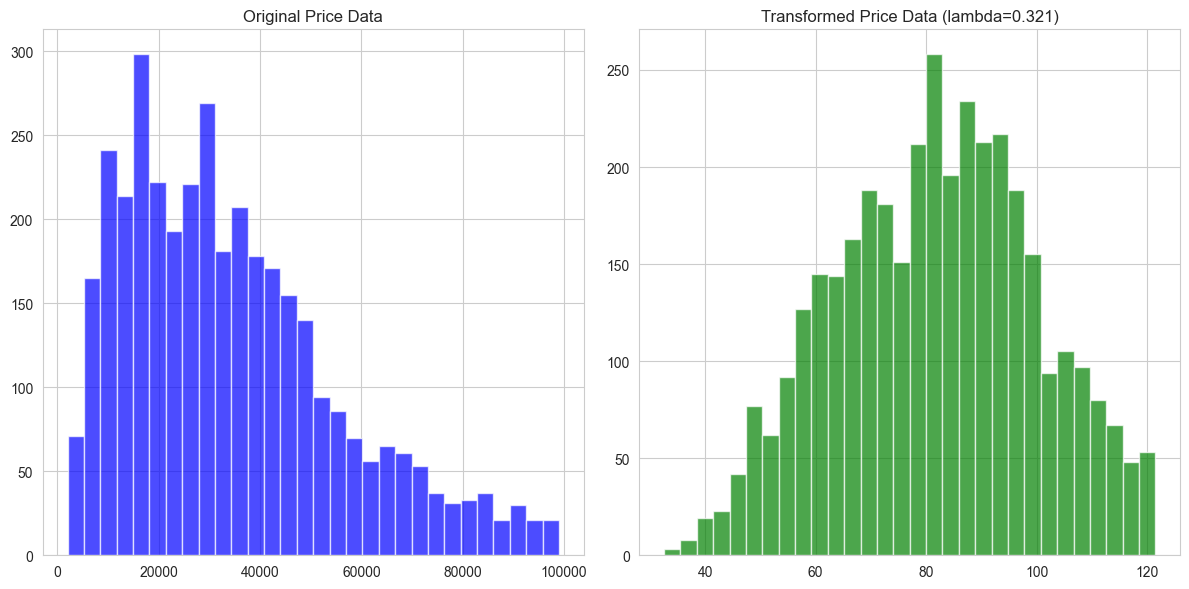

In [144]:

import scipy.stats as stats
import matplotlib.pyplot as plt

# Applying Box-Cox transformation to the 'price' column
bc_df = used_cars_data.copy().dropna()


def remove_outliers_iqr(dataframe, columns=None):
    if columns is None:
        columns = dataframe.select_dtypes(include='number').columns

    df_clean = dataframe.copy()

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

    return df_clean


# Remove outliers from numeric columns
bc_df = remove_outliers_iqr(bc_df)

price_data = bc_df['price']

# Check if all values are positive, as Box-Cox requires positive values
if (price_data > 0).all():
    # Apply Box-Cox transformation
    transformed_price, best_lambda = stats.boxcox(price_data)

    # Add the transformed data to the DataFrame
    bc_df['price_transformed'] = transformed_price

    # Display the best lambda (sigma) and the transformed price
    print(f"Optimal lambda (sigma) for 'price': {best_lambda}")
    print("\nTransformed 'price' values:")
    print(bc_df[['price', 'price_transformed']])
    bc_df.drop(columns=['price'], inplace=True)

    # Plot the original and transformed data
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Plot original 'price' data
    ax[0].hist(price_data, bins=30, alpha=0.7, color='blue', label='Original Data')
    ax[0].set_title('Original Price Data')

    # Plot transformed 'price' data
    ax[1].hist(transformed_price, bins=30, alpha=0.7, color='green', label='Transformed Data')
    ax[1].set_title(f'Transformed Price Data (lambda={best_lambda:.3f})')

    plt.tight_layout()
    plt.show()
else:
    print("Price data must be positive for Box-Cox transformation.")

In [145]:
bc_df

,mileage,fuel_type,accident,age,luxury_brand,automatic_transmission,price_transformed
0,51000,E85_Flex_Fuel,1,12,0,1,57.208625
1,34742,Gasoline,1,4,0,1,88.564462
2,22372,Gasoline,0,3,1,1,99.855825
3,88900,Hybrid,0,10,1,1,65.654153
4,9835,Gasoline,0,4,1,1,86.174269
...,...,...,...,...,...,...,...
4003,53705,Gasoline,1,7,1,1,77.958420
4005,10900,Gasoline,0,3,1,1,99.431936
4006,2116,electric,0,3,1,1,118.179424
4007,33000,Gasoline,0,5,0,1,104.690699


In [146]:
import pandas as pd

df = bc_df.copy()

# Check for missing values
# print(df.isna().sum())  # Show the count of NaNs for each column
# print((df == float("inf")).sum())  # Check for infinite values

# Handle missing values (if any)
# df = df.fillna(0)  # Example: Replace NaNs with 0, or use another strategy like mean or median imputation

# Assume 'used_cars_data' is already loaded and contains columns:
# ['price', 'mileage', 'age', 'fuel_type', 'accident']

# Copy data and drop missing values if needed
# df = used_cars_data.copy().dropna()

# Separate features and target
# df['price_transformed'] = df['price_transformed']
# df['fuel_type'] = df['fuel_type'].astype('category')
# df['accident'] = df['accident'].astype('category')  # Treat as categorical
# df['luxury_brand'] = df['luxury_brand'].astype('category')  # Treat as categorical
# df['automatic_transmission'] = df['automatic_transmission'].astype('category')  # Treat as categorical

df = pd.get_dummies(df, columns=['fuel_type', 'accident', 'luxury_brand', 'automatic_transmission'], drop_first=True)

# df = df.loc[:, df.var() > 0.01]  # You can adjust this threshold

# Check for constant columns
print(df.dtypes)  # Look for any column with variance = 0

# Add a constant column for intercept term
# X = add_constant(df)
# Calculate VIF for each feature
# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# print(vif_data)

df


mileage                       int64
age                           int64
price_transformed           float64
fuel_type_E85_Flex_Fuel        bool
fuel_type_Gasoline             bool
fuel_type_Hybrid               bool
fuel_type_PlugIn_Hybrid        bool
fuel_type_electric             bool
accident_1                     bool
luxury_brand_1                 bool
automatic_transmission_1       bool
dtype: object


,mileage,age,price_transformed,fuel_type_E85_Flex_Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_PlugIn_Hybrid,fuel_type_electric,accident_1,luxury_brand_1,automatic_transmission_1
0,51000,12,57.208625,True,False,False,False,False,True,False,True
1,34742,4,88.564462,False,True,False,False,False,True,False,True
2,22372,3,99.855825,False,True,False,False,False,False,True,True
3,88900,10,65.654153,False,False,True,False,False,False,True,True
4,9835,4,86.174269,False,True,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
4003,53705,7,77.958420,False,True,False,False,False,True,True,True
4005,10900,3,99.431936,False,True,False,False,False,False,True,True
4006,2116,3,118.179424,False,False,False,False,True,False,True,True
4007,33000,5,104.690699,False,True,False,False,False,False,False,True


In [147]:
df.var()

mileage                     2.180267e+09
age                         3.020567e+01
price_transformed           3.307321e+02
fuel_type_E85_Flex_Fuel     3.544898e-02
fuel_type_Gasoline          1.400229e-01
fuel_type_Hybrid            4.625044e-02
fuel_type_PlugIn_Hybrid     9.250918e-03
fuel_type_electric          4.326413e-02
accident_1                  2.027655e-01
luxury_brand_1              2.457249e-01
automatic_transmission_1    8.533276e-02
dtype: float64

In [148]:

import pandas as pd
import cupy as cp
import dask.array as da
from dask.distributed import Client, LocalCluster


class HighPerformanceVIF:
    def __init__(self, data, use_gpu=True, num_workers=None):
        """
        High-performance Variance Inflation Factor (VIF) calculator

        Parameters:
        -----------
        data : pandas.DataFrame
            Input feature matrix
        use_gpu : bool, optional
            Whether to use GPU acceleration (default: True)
        num_workers : int, optional
            Number of CPU workers for parallel processing
        """
        self.original_data = data
        self.use_gpu = use_gpu and self._check_gpu_availability()

        # Set up parallel processing
        self.cluster = LocalCluster(n_workers=num_workers)
        self.client = Client(self.cluster)

    def _check_gpu_availability(self):
        """
        Check if GPU is available and functional

        Returns:
        --------
        bool: GPU availability status
        """
        try:
            import cupy as cp
            cp.cuda.runtime.getDeviceCount()
            return True
        except (ImportError, cp.cuda.runtime.CUDARuntimeError):
            print("GPU not available or no CUDA devices found.")
            return False

    def prepare_data(self):
        """
        Prepare data for VIF calculation

        Returns:
        --------
        numpy.ndarray or cupy.ndarray: Processed feature matrix
        """
        # Select numeric and binary columns
        numeric_cols = self.original_data.select_dtypes(
            include=['int64', 'float64', 'bool']
        ).columns

        X = self.original_data[numeric_cols].copy()

        # Convert boolean to int
        for col in X.select_dtypes(include=['bool']):
            X[col] = X[col].astype(int)

        # Convert to numpy/cupy array
        if self.use_gpu:
            return cp.asarray(X.values, dtype=cp.float32)
        else:
            return X.values.astype(np.float32)

    def calculate_vif_gpu(self, X):
        """
        Calculate VIF using GPU acceleration

        Parameters:
        -----------
        X : cupy.ndarray
            Input feature matrix

        Returns:
        --------
        numpy.ndarray: VIF values
        """
        vif_values = np.zeros(X.shape[1])

        for i in range(X.shape[1]):
            # Select features except the current one
            X_subset = cp.delete(X, i, axis=1)

            # Perform linear regression on GPU
            y = X[:, i]
            X_subset_T = X_subset.T

            # Compute R-squared on GPU
            beta = cp.linalg.lstsq(X_subset, y)[0]
            y_pred = X_subset @ beta

            # Calculate R-squared
            ss_total = cp.sum((y - cp.mean(y)) ** 2)
            ss_residual = cp.sum((y - y_pred) ** 2)
            r_squared = 1 - (ss_residual / ss_total)

            # Calculate VIF
            vif_values[i] = 1 / (1 - r_squared)

        return vif_values

    def calculate_vif_cpu(self, X):
        """
        Calculate VIF using CPU with Dask for parallel processing

        Parameters:
        -----------
        X : numpy.ndarray
            Input feature matrix

        Returns:
        --------
        numpy.ndarray: VIF values
        """

        def compute_vif(X, feature_index):
            # Select features except the current one
            X_subset = np.delete(X, feature_index, axis=1)

            # Perform linear regression
            y = X[:, feature_index]
            beta = np.linalg.lstsq(X_subset, y, rcond=None)[0]
            y_pred = X_subset @ beta

            # Calculate R-squared
            ss_total = np.sum((y - np.mean(y)) ** 2)
            ss_residual = np.sum((y - y_pred) ** 2)
            r_squared = 1 - (ss_residual / ss_total)

            return 1 / (1 - r_squared)

        # Use Dask for parallel processing
        # dask_array = da.from_array(X, chunks='auto')
        # vif_values = da.map_blocks(
        #     compute_vif, dask_array,
        #     dtype=float,
        #     drop_axis=1,
        #     chunks=(X.shape[1],)
        # )
        #
        # return vif_values.compute()
        dask_array = da.from_array(X, chunks='auto')
        vif_values = da.map_blocks(
            compute_vif,
            dask_array,
            dtype=float,
            drop_axis=1,
            chunks=(X.shape[1],),
            feature_index=np.arange(X.shape[1])  # Pass feature indices
        )

        return vif_values.compute()

    def calculate_vif(self):
        """
        Main VIF calculation method

        Returns:
        --------
        pandas.DataFrame: VIF results
        """
        # Prepare data
        X = self.prepare_data()

        # Choose calculation method based on GPU availability
        if self.use_gpu:
            vif_values = self.calculate_vif_gpu(X)
        else:
            vif_values = self.calculate_vif_cpu(X)

        # Create results DataFrame
        vif_data = pd.DataFrame({
            'feature': self.original_data.select_dtypes(
                include=['int64', 'float64', 'bool']
            ).columns,
            'VIF': vif_values
        })

        return vif_data

    def __del__(self):
        """
        Clean up resources
        """
        if hasattr(self, 'client'):
            self.client.close()
        if hasattr(self, 'cluster'):
            self.cluster.close()


# Example usage function
def run_high_performance_vif(dataframe):
    """
    Run high-performance VIF calculation

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        Input feature matrix

    Returns:
    --------
    pandas.DataFrame: VIF results
    """
    # Try GPU-accelerated calculation first
    try:
        vif_calculator = HighPerformanceVIF(dataframe, use_gpu=True)
        vif_results = vif_calculator.calculate_vif()
        print("GPU Acceleration Used")
        return vif_results
    except Exception as gpu_error:
        print(f"GPU calculation failed: {gpu_error}")
        print("Falling back to CPU parallel processing")

        # Fallback to CPU parallel processing
        vif_calculator = HighPerformanceVIF(dataframe, use_gpu=False)
        vif_results = vif_calculator.calculate_vif()
        return vif_results


vif_df = df.copy()
# cols =['price_transformed','luxury_brand_1','fuel_type_electric','fuel_type_PlugIn_Hybrid','fuel_type_Hybrid','age','fuel_type_Gasoline']
cols = []
vif_df.drop(columns=cols, inplace=True)
while True:
    # Note: Replace with your actual DataFrame
    vif_results = run_high_performance_vif(vif_df)
    vif_results.sort_values(by=['VIF'], ascending=False, inplace=True)
    worse_vif = vif_results.iloc[0]['VIF']
    if worse_vif > 5:
        worse_col = vif_results.iloc[0]['feature']
        print(f"dropping {worse_vif} to {worse_col}")
        cols.append(worse_col)
        vif_df.drop(columns=[worse_col], inplace=True)
    else:
        print("stopping analysis")
        break

vif_results

GPU Acceleration Used
stopping analysis


C:\Users\frlin\OneDrive\Documentos\_uofc\2025 Winter\DATA_603\Project\impl\.venv\Lib\site-packages\cupy\linalg\_solve.py:171: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  warnings.warn(


,feature,VIF
4,fuel_type_Gasoline,3.269641
5,fuel_type_Hybrid,1.999690
0,mileage,1.996358
7,fuel_type_electric,1.962491
3,fuel_type_E85_Flex_Fuel,1.812578
1,age,1.787148
6,fuel_type_PlugIn_Hybrid,1.201724
9,luxury_brand_1,1.081608
8,accident_1,1.081289
10,automatic_transmission_1,1.011189


In [149]:
from itertools import combinations
target = 'price_transformed'
features = [col for col in vif_results['feature'] if col != target]
[f"{a}:{b}" for a, b in combinations(features, 2)]

['fuel_type_Gasoline:fuel_type_Hybrid',
 'fuel_type_Gasoline:mileage',
 'fuel_type_Gasoline:fuel_type_electric',
 'fuel_type_Gasoline:fuel_type_E85_Flex_Fuel',
 'fuel_type_Gasoline:age',
 'fuel_type_Gasoline:fuel_type_PlugIn_Hybrid',
 'fuel_type_Gasoline:luxury_brand_1',
 'fuel_type_Gasoline:accident_1',
 'fuel_type_Gasoline:automatic_transmission_1',
 'fuel_type_Hybrid:mileage',
 'fuel_type_Hybrid:fuel_type_electric',
 'fuel_type_Hybrid:fuel_type_E85_Flex_Fuel',
 'fuel_type_Hybrid:age',
 'fuel_type_Hybrid:fuel_type_PlugIn_Hybrid',
 'fuel_type_Hybrid:luxury_brand_1',
 'fuel_type_Hybrid:accident_1',
 'fuel_type_Hybrid:automatic_transmission_1',
 'mileage:fuel_type_electric',
 'mileage:fuel_type_E85_Flex_Fuel',
 'mileage:age',
 'mileage:fuel_type_PlugIn_Hybrid',
 'mileage:luxury_brand_1',
 'mileage:accident_1',
 'mileage:automatic_transmission_1',
 'fuel_type_electric:fuel_type_E85_Flex_Fuel',
 'fuel_type_electric:age',
 'fuel_type_electric:fuel_type_PlugIn_Hybrid',
 'fuel_type_electric:

In [150]:
import pandas as pd
import numpy as np

def add_interactions(df):
    """Add interaction terms dynamically to the DataFrame."""
    cols = df.columns
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            # Create interaction term by multiplying the columns
            interaction_name = f"{cols[i]}*{cols[j]}"
            df[interaction_name] = df[cols[i]] * df[cols[j]]
    return df

def remove_highly_correlated(df, threshold=0.95):
    """Remove columns that are highly correlated with other columns."""
    while True:
        # Compute the correlation matrix (absolute values)
        correlation_matrix = df.corr().abs()

        # Find the pairs of variables with correlation greater than the threshold
        upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
        to_drop = set()

        # Iterate through the upper triangle of the correlation matrix to identify highly correlated pairs
        for col in upper_triangle.columns:
            high_corr_cols = upper_triangle[col][upper_triangle[col] > threshold].index
            to_drop.update(high_corr_cols)

        # If no variables are highly correlated, break the loop
        if not to_drop:
            break

        # Drop the first variable from the set of highly correlated variables
        col_to_drop = list(to_drop)[0]  # Drop one variable at a time
        df = df.drop(columns=col_to_drop)

    return df

# Step 1: Add interaction terms
df_with_interactions = add_interactions(df.copy().drop(columns=['price_transformed']))

# Step 2: Remove highly correlated columns (correlation > 0.95)
cleaned_df = remove_highly_correlated(df_with_interactions, threshold=0.95)
cleaned_df

,mileage,age,fuel_type_Gasoline,accident_1,luxury_brand_1,automatic_transmission_1,mileage*age,mileage*fuel_type_E85_Flex_Fuel,mileage*fuel_type_Gasoline,mileage*fuel_type_Hybrid,...,fuel_type_PlugIn_Hybrid*fuel_type_electric,fuel_type_PlugIn_Hybrid*accident_1,fuel_type_PlugIn_Hybrid*luxury_brand_1,fuel_type_PlugIn_Hybrid*automatic_transmission_1,fuel_type_electric*accident_1,fuel_type_electric*luxury_brand_1,fuel_type_electric*automatic_transmission_1,accident_1*luxury_brand_1,accident_1*automatic_transmission_1,luxury_brand_1*automatic_transmission_1
0,51000,12,False,True,False,True,612000,51000,0,0,...,False,False,False,False,False,False,False,False,True,False
1,34742,4,True,True,False,True,138968,0,34742,0,...,False,False,False,False,False,False,False,False,True,False
2,22372,3,True,False,True,True,67116,0,22372,0,...,False,False,False,False,False,False,False,False,False,True
3,88900,10,False,False,True,True,889000,0,0,88900,...,False,False,False,False,False,False,False,False,False,True
4,9835,4,True,False,True,True,39340,0,9835,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,53705,7,True,True,True,True,375935,0,53705,0,...,False,False,False,False,False,False,False,True,True,True
4005,10900,3,True,False,True,True,32700,0,10900,0,...,False,False,False,False,False,False,False,False,False,True
4006,2116,3,False,False,True,True,6348,0,0,0,...,False,False,False,False,False,True,True,False,False,True
4007,33000,5,True,False,False,True,165000,0,33000,0,...,False,False,False,False,False,False,False,False,False,False


In [151]:
# Select only the boolean columns
boolean_columns = cleaned_df.select_dtypes(include=['bool'])

# Convert boolean columns to integers (True=1, False=0)
cleaned_df[boolean_columns.columns] = cleaned_df[boolean_columns.columns].astype(int)

# Now, the boolean columns will be treated as integers
cleaned_df.describe()


,mileage,age,fuel_type_Gasoline,accident_1,luxury_brand_1,automatic_transmission_1,mileage*age,mileage*fuel_type_E85_Flex_Fuel,mileage*fuel_type_Gasoline,mileage*fuel_type_Hybrid,...,fuel_type_PlugIn_Hybrid*fuel_type_electric,fuel_type_PlugIn_Hybrid*accident_1,fuel_type_PlugIn_Hybrid*luxury_brand_1,fuel_type_PlugIn_Hybrid*automatic_transmission_1,fuel_type_electric*accident_1,fuel_type_electric*luxury_brand_1,fuel_type_electric*automatic_transmission_1,accident_1*luxury_brand_1,accident_1*automatic_transmission_1,luxury_brand_1*automatic_transmission_1
count,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3.642000e+03,3642.000000,3642.000000,3642.000000,...,3642.0,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,64420.059308,9.258924,0.831686,0.282537,0.434102,0.905821,7.562332e+05,3718.200714,54843.189731,2043.562878,...,0.0,0.003020,0.006041,0.009336,0.003020,0.029105,0.045030,0.115047,0.256727,0.404723
std,46693.330590,5.495968,0.374196,0.450295,0.495707,0.292118,8.212856e+05,21036.432497,48612.124813,12582.560659,...,0.0,0.054882,0.077497,0.096182,0.054882,0.168124,0.207399,0.319122,0.436888,0.490906
min,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+02,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25990.250000,5.000000,1.000000,0.000000,0.000000,1.000000,1.358725e+05,0.000000,12717.750000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55000.000000,8.000000,1.000000,0.000000,0.000000,1.000000,4.547840e+05,0.000000,45000.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,94000.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.096375e+06,0.000000,86075.750000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,202055.000000,25.000000,1.000000,1.000000,1.000000,1.000000,4.856925e+06,196300.000000,202055.000000,168422.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [152]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


# Target variable (dependent variable)
target = 'price_transformed'
y = df[target]  # Replace 'target' with your actual target variable

df_model = cleaned_df.copy()
df_model['price_transformed'] = y

train_df, test_df = train_test_split(df_model, test_size=0.2, random_state=42)

X = df_model  # This contains all the predictors

while True:
    # Fit the linear regression model
    model = sm.OLS(y, X).fit()
    pv = model.pvalues.reset_index()
    pv.columns = ['pred', 'pval']
    pv.sort_values(by=['pval'], ascending=False, inplace=True)
    while True:
        worse_pv = pv.iloc[0]
        if worse_pv['pval'] <= 0.05:
            print(f"no more insignificant p-value found {worse_pv['pred']} with (p≈{worse_pv['pval']:.4f})")
            break
        worse_term = worse_pv['pred']
        # print(type(worse_term))
        # print(worse_term)
        if not '*' in worse_term:
            pv = pv.iloc[1:]
            continue
        normalized_worse_term = re.sub(r"(\w+)(\[[\w\.]+\])*:(\w+)(\[[\w\.]+\])*", r"\1:\3", worse_term)
        # print(f"found worse_term {normalized_worse_term}")
        # X.drop(columns=[worse_term], inplace=True)
        # print(len(X.columns))
        df_model.drop(columns=[worse_term], inplace=True)
        train_df, test_df = train_test_split(df_model, test_size=0.2, random_state=42)
        X = df_model  # This contains all the predictors
        #
        #
        # # Add a constant term for the intercept
        # X = sm.add_constant(X)
        break

    if worse_pv['pval'] <= 0.05:
        break


no more insignificant p-value found mileage*fuel_type_E85_Flex_Fuel with (p≈0.0013)


In [111]:
print(len(train_df.columns))
print(len(test_df.columns))
print(X.shape[1])

# Identify missing columns
missing_columns = set(X.columns) - set(train_df.columns)
print("Missing columns:", missing_columns)


20
20
20
Missing columns: set()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from itertools import combinations
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_model = df.copy()
# Optionally scale numeric columns
scaler = StandardScaler()
df_model[['mileage', 'age']] = scaler.fit_transform(df_model[['mileage', 'age']])

# Split the data
train_df, test_df = train_test_split(df_model, test_size=0.2, random_state=42)

# Target variable (dependent variable)
target = 'price_transformed'

# List of independent variables (features)
features = [col for col in vif_results['feature'] if col != target]
interaction_terms = [f"{a}:{b}" for a, b in combinations(features, 2)]

def build_formula(main_effects):
    formula = f"{target} ~ " + " + ".join([feature for feature in main_effects])
    return formula

# Function to build formula string
def build_interaction_formula(main, interactions):
    return f"{target} ~ " + " + ".join(main + interactions)


# Create the formula dynamically
while True:
    formula = build_formula(features)
    model = smf.ols(formula=formula, data=df).fit()

    interaction_pvals = {}
    for term in features:
        pv = model.pvalues.reset_index()
        pv.columns = ['pred', 'pval']
        pvals = pv[pv['pred'].str.contains(term)]['pval']
        pvals = pvals[pvals > 0.05].tolist()
        # matching_terms = [name for name in model.pvalues.index if term in name and ':' in name]
        # pvals = [model.pvalues[name] for name in matching_terms if model.pvalues[name] >= 0.05]
        if pvals:
            interaction_pvals[term] = max(pvals)  # track worst offending p-value for this term

    if not interaction_pvals:
        break  # all remaining interaction terms are significant

    # Remove the worst interaction based on p-value
    worst_term = max(interaction_pvals, key=interaction_pvals.get)
    print(f"Removing interaction: {worst_term} (p≈{interaction_pvals[worst_term]:.4f})")
    features.remove(worst_term)

ignored_terms = [features]
# Stepwise elimination loop
while True:
    formula = build_interaction_formula(features, interaction_terms)
    model = smf.ols(formula=formula, data=df).fit()

    # Capture any p-values >= 0.05 for expanded interaction terms
    pv = model.pvalues.reset_index()
    pv.columns = ['pred', 'pval']
    pv.sort_values(by=['pval'], ascending=False, inplace=True)
    while True:
        worse_pv = pv.iloc[0]
        if worse_pv['pval'] <= 0.05:
            print(f"no more insignificant p-value found {worse_pv['pred']} with (p≈{worse_pv['pval']:.4f})")
            break
        worse_term = worse_pv['pred']
        # print(type(worse_term))
        # print(worse_term)
        if not ':' in worse_term:
            pv = pv.iloc[1:]
            continue
        normalized_worse_term = re.sub(r"(\w+)(\[[\w\.]+\])*:(\w+)(\[[\w\.]+\])*", r"\1:\3", worse_term)
        if normalized_worse_term in ignored_terms:
            print("ignoring worse term")
            pv = pv.iloc[1:]
        else:
            print(f"found worse_term {normalized_worse_term}")
            break
    try:
        normalized_worse_term
    except NameError:
        print(f"worse term is not define")
        break

    target_term = [term for term in interaction_terms if normalized_worse_term == term]
    if not target_term:
        print(f"No interactions found for {worse_term}")
        ignored_terms.append(worse_term)
        break
    else:
        print(f"Removing interaction: {target_term} (p≈{worse_pv['pval']:.4f})")

        interaction_terms = [term for term in interaction_terms if term not in target_term]

        # Ensure that remaining interaction terms are present in the DataFrame columns
        valid_interaction_terms = [term for term in features if df.columns.str.contains(term).any()]

        # If no valid interaction terms remain, break the loop
        if not valid_interaction_terms:
            print("No valid interaction terms remaining.")
            break

        # Check multicollinearity using VIF
        # 1. Compute the correlation matrix
        correlation_matrix = df_model.corr().abs()  # Use absolute value of correlation

        # 2. Set a threshold for correlation (e.g., 0.95 for strong correlation)
        threshold = 0.95

        # 3. Find index pairs where correlation is above the threshold (excluding diagonal)
        to_drop = set()  # Keep track of columns to drop
        for i in range(len(correlation_matrix.columns)):
            for j in range(i):
                if correlation_matrix.iloc[i, j] > threshold:
                    # Add the column with higher correlation to the drop list
                    colname = correlation_matrix.columns[i]
                    to_drop.add(colname)

        # 4. Drop the highly correlated variables
        X = X.drop(columns=to_drop)




# Final model
formula = build_interaction_formula(features,interaction_terms)
# Fit the model using the dynamically created formula
model = smf.ols(formula=formula, data=df_model).fit()

print(formula)
# Summary of model
print(model.summary())

In [108]:
 model.predict(train_df)

3063     79.274960
3454    102.443235
2517     69.998687
1989     95.589773
3207     95.565395
           ...    
1257     77.011300
1435    102.852633
957      62.720055
3860     85.567374
3491     52.229166
Length: 2913, dtype: float64


=== 1. Linearity Assumption ===


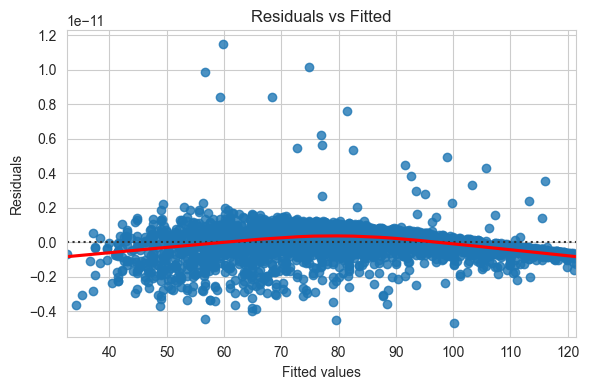

→ Check for non-random pattern. A curved or funnel shape violates linearity.

=== 2. Independence Assumption ===
Durbin-Watson statistic: 1.031
→ Values close to 2 suggest independence (no autocorrelation).

=== 3. Equal Variance (Homoscedasticity) ===


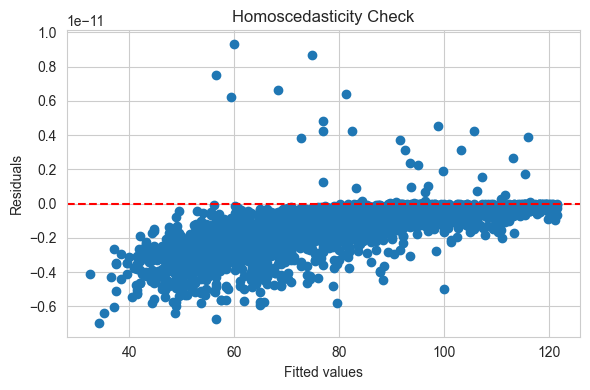

→ Look for constant spread. Funnel shape suggests heteroscedasticity.

=== 4. Normality of Residuals ===


<Figure size 600x400 with 0 Axes>

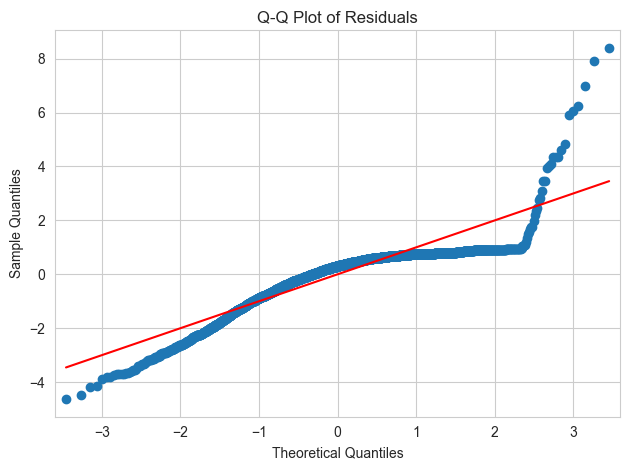

Shapiro-Wilk test: p-value = 0.0000
→ p > 0.05 suggests normality.

=== 5. Multicollinearity (VIF) ===
                                           Variable        VIF
0                                           mileage  16.913527
1                                               age  12.701100
2                                fuel_type_Gasoline   7.231877
3                                        accident_1   1.509232
4                                    luxury_brand_1   1.903941
5                          automatic_transmission_1  10.195467
6                                       mileage*age  19.519463
7                   mileage*fuel_type_E85_Flex_Fuel   1.343838
8                   mileage*fuel_type_PlugIn_Hybrid   1.042796
9        fuel_type_E85_Flex_Fuel*fuel_type_Gasoline        NaN
10         fuel_type_E85_Flex_Fuel*fuel_type_Hybrid        NaN
11  fuel_type_E85_Flex_Fuel*fuel_type_PlugIn_Hybrid        NaN
12       fuel_type_E85_Flex_Fuel*fuel_type_electric        NaN
13             

C:\Users\frlin\OneDrive\Documentos\_uofc\2025 Winter\DATA_603\Project\impl\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


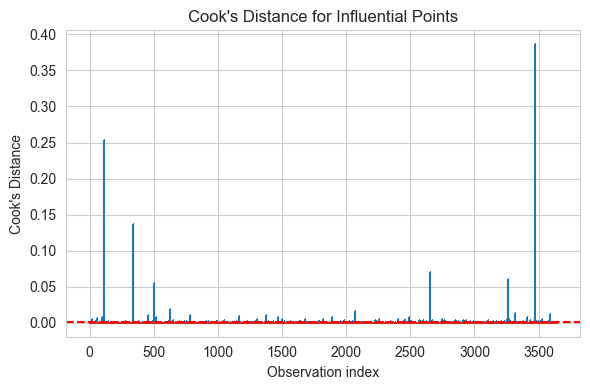

→ Points above red line may be influential (check if Cook's D > 4/n).


In [153]:
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Predict and compute residuals on training set
train_df['predicted'] = model.predict(train_df)
train_df['residuals'] = train_df['price_transformed'] - train_df['predicted']

# Residuals and fitted values
residuals = model.resid
fitted = model.fittedvalues

print("\n=== 1. Linearity Assumption ===")
plt.figure(figsize=(6, 4))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.tight_layout()
plt.show()

print("→ Check for non-random pattern. A curved or funnel shape violates linearity.")

print("\n=== 2. Independence Assumption ===")
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat:.3f}")
print("→ Values close to 2 suggest independence (no autocorrelation).")

print("\n=== 3. Equal Variance (Homoscedasticity) ===")
plt.figure(figsize=(6, 4))
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.tight_layout()
plt.show()
print("→ Look for constant spread. Funnel shape suggests heteroscedasticity.")

print("\n=== 4. Normality of Residuals ===")
plt.figure(figsize=(6, 4))
sm.qqplot(residuals, line='s', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

stat, p = shapiro(residuals)
print(f"Shapiro-Wilk test: p-value = {p:.4f}")
print("→ p > 0.05 suggests normality.")

print("\n=== 5. Multicollinearity (VIF) ===")
# Create design matrix without dummies
X = model.model.exog
vif_df = pd.DataFrame({
    'Variable': model.model.exog_names,
    'VIF': [variance_inflation_factor(X, i) for i in range(X.shape[1])]
})
print(vif_df)
print("→ VIF > 5 (sometimes > 10) indicates problematic multicollinearity.")

# print("\n=== 6. Outliers and Influential Points ===")
# influence = OLSInfluence(model)
# (c, p) = influence.cooks_distance
#
# plt.figure(figsize=(6, 4))
# plt.stem(np.arange(len(c)), c, markerfmt=",")
# plt.axhline(4 / len(c), color='red', linestyle='--')
# plt.title("Cook's Distance for Influential Points")
# plt.xlabel("Observation index")
# plt.ylabel("Cook's Distance")
# plt.tight_layout()
# plt.show()

from statsmodels.stats.outliers_influence import OLSInfluence
import numpy as np
import matplotlib.pyplot as plt

print("\n=== 6. Outliers and Influential Points ===")

try:
    influence = OLSInfluence(model)
    (c, p) = influence.cooks_distance

    plt.figure(figsize=(6, 4))
    plt.stem(np.arange(len(c)), c, markerfmt=",")
    plt.axhline(4 / len(c), color='red', linestyle='--')
    plt.title("Cook's Distance for Influential Points")
    plt.xlabel("Observation index")
    plt.ylabel("Cook's Distance")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Could not compute Cook's Distance due to error: {e}")

print("→ Points above red line may be influential (check if Cook's D > 4/n).")

In [52]:
vif_results.sort_values(by=['VIF'], ascending=False, inplace=True)
worse_vif = vif_results.iloc[0]['VIF']
worse_vif

np.float64(8.468085289001465)

In [35]:



# Prepare DataFrame for VIF
def prepare_for_vif(X):
    # Select only numeric and binary columns
    numeric_cols = X.select_dtypes(include=['int64', 'float64', 'bool']).columns
    X_numeric = X[numeric_cols].copy()

    # Convert boolean to int
    for col in X_numeric.select_dtypes(include=['bool']):
        X_numeric[col] = X_numeric[col].astype(int)

    return X_numeric


# Calculate VIF
def calculate_vif(X):
    # Prepare data
    X_prepared = prepare_for_vif(X)

    # Convert to numpy float array
    X_array = X_prepared.values.astype(float)

    # Calculate VIF
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_prepared.columns
    vif_data["VIF"] = [variance_inflation_factor(X_array, i)
                       for i in range(X_array.shape[1])]

    return vif_data


vif_df = df.copy()
vif_df.drop(columns=['price_transformed', 'fuel_type_Gasoline', 'age'], inplace=True)

# Example usage
vif_results = calculate_vif(vif_df)
vif_results

LinAlgError: SVD did not converge

In [ ]:



def preprocess_dataframe(df):
    """
    Safely prepare DataFrame for finite value checks

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame with mixed column types

    Returns:
    --------
    pandas.DataFrame
        DataFrame with numeric columns ready for isfinite checks
    """
    # Identify numeric and boolean columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    bool_cols = df.select_dtypes(include=['bool']).columns

    # Create a copy of the DataFrame
    processed_df = df.copy()

    # Convert boolean columns to numeric (0 and 1)
    for col in bool_cols:
        processed_df[col] = processed_df[col].astype(int)

    return processed_df


def check_finite_values(df):
    """
    Perform finite value checks on numeric columns

    Parameters:
    -----------
    df : pandas.DataFrame
        Preprocessed DataFrame

    Returns:
    --------
    dict
        Dictionary with finite value checks for each numeric column
    """
    # Preprocess the DataFrame
    processed_df = preprocess_dataframe(df)

    # Identify numeric columns
    numeric_cols = processed_df.select_dtypes(include=['int64', 'float64']).columns

    # Check finite values for each numeric column
    finite_checks = {}
    for col in numeric_cols:
        finite_mask = np.isfinite(processed_df[col])
        finite_checks[col] = {
            'total_values': len(processed_df[col]),
            'finite_values': finite_mask.sum(),
            'non_finite_values': (~finite_mask).sum(),
            'non_finite_percentage': (~finite_mask).mean() * 100
        }

    return finite_checks


# Example usage
def demonstrate_preprocessing(df):
    print("Original DataFrame Column Types:")
    print(df.dtypes)

    print("\nPreprocessing and Finite Value Checks:")
    finite_results = check_finite_values(df)

    for col, stats in finite_results.items():
        print(f"\nColumn: {col}")
        print(f"Total Values: {stats['total_values']}")
        print(f"Finite Values: {stats['finite_values']}")
        print(f"Non-Finite Values: {stats['non_finite_values']}")
        print(f"Non-Finite Percentage: {stats['non_finite_percentage']:.2f}%")

    return finite_results


# Placeholder for the actual DataFrame
# df = your_dataframe_here
demonstrate_preprocessing(df)

In [ ]:
# corr_matrix = df.corr()
# # Create a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
#
# # Display the plot
# plt.title("Correlation Heatmap")
# plt.show()

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from itertools import combinations
from statsmodels.tools.tools import add_constant

df = bc_df.copy()


def remove_outliers_iqr(dataframe, columns=None):
    if columns is None:
        columns = dataframe.select_dtypes(include='number').columns

    df_clean = dataframe.copy()

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

    return df_clean


# Remove outliers from numeric columns
df = remove_outliers_iqr(df)

# Assume 'used_cars_data' is already loaded and contains columns:
# ['price', 'mileage', 'age', 'fuel_type', 'accident']

# Copy data and drop missing values if needed
# df = used_cars_data.copy().dropna()

# Separate features and target
df['price_transformed'] = df['price_transformed']
# df['fuel_type'] = df['fuel_type'].astype('category')
df['accident'] = df['accident'].astype('category')  # Treat as categorical
df['luxury_brand'] = df['luxury_brand'].astype('category')  # Treat as categorical
df['automatic_transmission'] = df['automatic_transmission'].astype('category')  # Treat as categorical

df = pd.get_dummies(df, columns=['fuel_type'], drop_first=True)

# Add a constant column for intercept term
X = add_constant(df)
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# Optionally scale numeric columns
scaler = StandardScaler()
df[['mileage', 'age']] = scaler.fit_transform(df[['mileage', 'age']])

# Split the data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Target variable (dependent variable)
target = 'price_transformed'

# List of independent variables (features)
features = [col for col in df.columns if col != target]
# Create the formula dynamically
# formula = f"{target} ~ " + " + ".join([f"C({feature})" if df[feature].dtype == 'category' else feature for feature in features])

# Build formula with full pairwise interactions
main_effects = features
interaction_terms = [f"{a}:{b}" for a, b in combinations(features, 2)]


# Combine everything into a formula
# formula = f"{target} ~ " + " + ".join(main_effects + interaction_terms)

# Function to build formula string
def build_formula(main, interactions):
    return f"{target} ~ " + " + ".join(main + interactions)


# Function to calculate VIF for each feature in the model
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data


# Stepwise elimination loop
while True:
    formula = build_formula(main_effects, interaction_terms)
    model = smf.ols(formula=formula, data=df).fit()

    # Capture any p-values >= 0.05 for expanded interaction terms
    interaction_pvals = {}
    for term in interaction_terms:
        pv = model.pvalues.reset_index()
        pv.columns = ['pred', 'pval']
        pvals = pv[pv['pred'].str.contains(term)]['pval']
        pvals = pvals[pvals > 0.05].tolist()
        # matching_terms = [name for name in model.pvalues.index if term in name and ':' in name]
        # pvals = [model.pvalues[name] for name in matching_terms if model.pvalues[name] >= 0.05]
        if pvals:
            interaction_pvals[term] = max(pvals)  # track worst offending p-value for this term

    if not interaction_pvals:
        break  # all remaining interaction terms are significant

    # Remove the worst interaction based on p-value
    worst_term = max(interaction_pvals, key=interaction_pvals.get)
    print(f"Removing interaction: {worst_term} (p≈{interaction_pvals[worst_term]:.4f})")
    interaction_terms.remove(worst_term)

    # Ensure that remaining interaction terms are present in the DataFrame columns
    valid_interaction_terms = [term for term in main_effects if df.columns.str.contains(term).any()]

    # If no valid interaction terms remain, break the loop
    if not valid_interaction_terms:
        print("No valid interaction terms remaining.")
        break

    # Check multicollinearity using VIF
    X = df[main_effects + valid_interaction_terms]
    vif_data = calculate_vif(X)
    high_vif_features = vif_data[vif_data["VIF"] > 10]  # VIF threshold of 10, can be adjusted

    if not high_vif_features.empty:
        # Remove the feature with the highest VIF
        high_vif_term = high_vif_features.loc[high_vif_features["VIF"].idxmax(), "Variable"]
        print(f"High multicollinearity detected: {high_vif_term} (VIF={high_vif_features['VIF'].max():.2f})")
        main_effects.remove(high_vif_term)  # Remove the main effect causing multicollinearity

# Final model
formula = build_formula(main_effects, interaction_terms)
# final_model = smf.ols(formula=final_formula, data=df).fit()

print(formula)

# Fit the model using the dynamically created formula
model = smf.ols(formula=formula, data=df).fit()

# Fit the model using statsmodels and formula with C(accident)
# Including fuel_type as well with C(fuel_type) if needed
# model = smf.ols(formula='price ~ mileage + age + C(fuel_type) + C(accident) + C(luxury_brand) + C(automatic_transmission)', data=train_df).fit()

# model = smf.ols(formula='price ~ mileage + C(luxury_brand)', data=train_df).fit()

# Summary of model
print(model.summary())

# Predict and compute residuals on training set
train_df['predicted'] = model.predict(train_df)
train_df['residuals'] = train_df['price_transformed'] - train_df['predicted']

# Residuals and fitted values
residuals = model.resid
fitted = model.fittedvalues

print("\n=== 1. Linearity Assumption ===")
plt.figure(figsize=(6, 4))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.tight_layout()
plt.show()

print("→ Check for non-random pattern. A curved or funnel shape violates linearity.")

print("\n=== 2. Independence Assumption ===")
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat:.3f}")
print("→ Values close to 2 suggest independence (no autocorrelation).")

print("\n=== 3. Equal Variance (Homoscedasticity) ===")
plt.figure(figsize=(6, 4))
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.tight_layout()
plt.show()
print("→ Look for constant spread. Funnel shape suggests heteroscedasticity.")

print("\n=== 4. Normality of Residuals ===")
plt.figure(figsize=(6, 4))
sm.qqplot(residuals, line='s', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

stat, p = shapiro(residuals)
print(f"Shapiro-Wilk test: p-value = {p:.4f}")
print("→ p > 0.05 suggests normality.")

print("\n=== 5. Multicollinearity (VIF) ===")
# Create design matrix without dummies
X = model.model.exog
vif_df = pd.DataFrame({
    'Variable': model.model.exog_names,
    'VIF': [variance_inflation_factor(X, i) for i in range(X.shape[1])]
})
print(vif_df)
print("→ VIF > 5 (sometimes > 10) indicates problematic multicollinearity.")

# print("\n=== 6. Outliers and Influential Points ===")
# influence = OLSInfluence(model)
# (c, p) = influence.cooks_distance
#
# plt.figure(figsize=(6, 4))
# plt.stem(np.arange(len(c)), c, markerfmt=",")
# plt.axhline(4 / len(c), color='red', linestyle='--')
# plt.title("Cook's Distance for Influential Points")
# plt.xlabel("Observation index")
# plt.ylabel("Cook's Distance")
# plt.tight_layout()
# plt.show()

from statsmodels.stats.outliers_influence import OLSInfluence
import numpy as np
import matplotlib.pyplot as plt

print("\n=== 6. Outliers and Influential Points ===")

try:
    influence = OLSInfluence(model)
    (c, p) = influence.cooks_distance

    plt.figure(figsize=(6, 4))
    plt.stem(np.arange(len(c)), c, markerfmt=",")
    plt.axhline(4 / len(c), color='red', linestyle='--')
    plt.title("Cook's Distance for Influential Points")
    plt.xlabel("Observation index")
    plt.ylabel("Cook's Distance")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Could not compute Cook's Distance due to error: {e}")

print("→ Points above red line may be influential (check if Cook's D > 4/n).")

mileage                       int64
accident                   category
age                           int64
luxury_brand               category
automatic_transmission     category
price_transformed           float64
fuel_type_E85_Flex_Fuel        bool
fuel_type_Gasoline             bool
fuel_type_Hybrid               bool
fuel_type_PlugIn_Hybrid        bool
fuel_type_electric             bool
dtype: object
Removing interaction: age:fuel_type_E85_Flex_Fuel (p≈0.8745)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [50]:
pv = model.pvalues.reset_index()
pv.columns = ['pred', 'pval']
pv.loc[pv['pval'] < 0.05,]
# pv

,pred,pval
2,C(luxury_brand)[T.1],5.728083e-20
10,mileage,1.820350e-39


In [185]:
from scipy.stats import boxcox


def apply_boxcox_and_get_lambdas(df):
    lambdas = {}
    df_transformed = df.copy()

    # Only numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        # Ensure all values are positive (Box-Cox requirement)
        if (df[col] <= 0).any():
            print(f"Skipping '{col}': contains non-positive values.")
            continue

        # Apply Box-Cox
        transformed_data, fitted_lambda = boxcox(df[col])
        df_transformed[col] = transformed_data
        lambdas[col] = fitted_lambda

    return df_transformed, lambdas


# Assuming X_train is your DataFrame
X_train_numeric = used_cars_data[['price', 'mileage', 'age']]

X_train_transformed, lambda_dict = apply_boxcox_and_get_lambdas(X_train_numeric)

print("Best λ (lambda) values for Box-Cox per column:")
print(lambda_dict)


Best λ (lambda) values for Box-Cox per column:
{'price': np.float64(-0.03234426365095393), 'mileage': np.float64(0.39015460893645404), 'age': np.float64(0.14249251527200352)}


In [ ]:
def boxcox_transform(x, lmbda):
    if lmbda == 0:
        return np.log(x)
    else:
        return (np.power(x, lmbda) - 1) / lmbda


used_cars_data_bc =

In [ ]:


import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume 'used_cars_data' is already loaded and contains columns:
# ['price', 'mileage', 'age', 'fuel_type', 'accident']

# Copy data and drop missing values if needed
df = used_cars_data.copy().dropna()

# Separate features and target
df['price'] = df['price']
df['fuel_type'] = df['fuel_type'].astype('category')
df['accident'] = df['accident'].astype('category')  # Treat as categorical

# Optionally scale numeric columns
scaler = StandardScaler()
df[['mileage', 'age']] = scaler.fit_transform(df[['mileage', 'age']])

# Split the data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Fit the model using statsmodels and formula with C(accident)
# Including fuel_type as well with C(fuel_type) if needed
model = smf.ols(formula='price ~ mileage + age + C(fuel_type) + C(accident)', data=train_df).fit()

# Summary of model
print(model.summary())

# Predict and compute residuals on training set
train_df['predicted'] = model.predict(train_df)
train_df['residuals'] = train_df['price'] - train_df['predicted']


In [125]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate features and target
X = used_cars_data.drop('price', axis=1)
y = used_cars_data['price']


# Convert categorical variables to numeric
def preprocess_categorical(X):
    X_processed = X.copy()
    # One-hot encode fuel_type
    fuel_type_dummies = pd.get_dummies(X_processed['fuel_type'], prefix='fuel')
    X_processed = pd.concat([X_processed.drop('fuel_type', axis=1), fuel_type_dummies], axis=1)
    return X_processed


# Preprocess the data
X_processed = preprocess_categorical(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Define preprocessing for numeric columns
scaler = StandardScaler()
numeric_columns = ['mileage', 'age']
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Define preprocessing for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
    ],
    remainder='passthrough'
)

# Create a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Predictions and residuals
X_train_processed = preprocessor.transform(X_train)
y_pred = model.predict(X_train)
residuals = y_train - y_pred


In [140]:
used_cars_data[used_cars_data['accident'] <= 0]

,price,mileage,fuel_type,accident,age,luxury_brand,automatic_transmission
2,54598,22372,Gasoline,0,2,1,1
3,15500,88900,Hybrid,0,9,1,1
4,34999,9835,Gasoline,0,3,1,1
5,14798,136397,Gasoline,0,8,1,0
6,31000,84000,Gasoline,0,7,1,1
...,...,...,...,...,...,...,...
4002,175000,2000,Hybrid,0,1,1,1
4004,349950,714,Gasoline,0,1,1,1
4005,53900,10900,Gasoline,0,2,1,1
4006,90998,2116,electric,0,2,1,1


In [124]:

# Make predictions
# y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.4f}")


# Feature importance visualization
def get_feature_names(column_transformer):
    feature_names = []
    for name, pipe, features in column_transformer.transformers_:
        if name == 'num':
            feature_names.extend(features)
        elif name == 'cat':
            feature_names.extend(pipe.get_feature_names_out(features).tolist())
        elif name == 'remainder':
            # Handle remainder features
            if isinstance(features, list):
                feature_names.extend(features)
            else:
                feature_names.extend(X.columns[features].tolist())
    return feature_names


# Get feature names and coefficients
feature_names = get_feature_names(model.named_steps['preprocessor'])
coefficients = model.named_steps['regressor'].coef_

# Plot feature importances
# plt.figure(figsize=(10, 6))
# plt.bar(feature_names, np.abs(coefficients))
# plt.title('Feature Importance in Car Price Prediction')
# plt.xlabel('Features')
# plt.ylabel('Absolute Coefficient Value')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

# Optional: Residual plot
# plt.figure(figsize=(10, 6))
# plt.scatter(y_pred, y_test - y_pred)
# plt.title('Residual Plot')
# plt.xlabel('Predicted Prices')
# plt.ylabel('Residuals')
# plt.axhline(y=0, color='r', linestyle='--')
# plt.tight_layout()
# plt.show()

# Print out detailed model coefficients
# print("\nModel Coefficients:")
# for name, coef in zip(feature_names, coefficients):
#     print(f"{name}: {coef:.4f}")

# Optional: Add confidence interval estimation

# Confidence intervals for coefficients
# def calculate_coefficient_confidence_intervals(X, y):
#     # Fit the model
#     lr = LinearRegression().fit(X, y)
#
#     # Calculate confidence intervals
#     n = X.shape[0]
#     p = X.shape[1]
#
#     # Calculate MSE
#     y_pred = lr.predict(X)
#     mse = np.mean((y - y_pred)**2)
#
#     # Standard error of the estimate
#     se = np.sqrt(mse * np.linalg.inv(X.T.dot(X)).diagonal())
#
#     # T-value
#     t_value = stats.t.ppf(0.975, n - p)
#
#     # Confidence intervals
#     ci_lower = lr.coef_ - t_value * se
#     ci_upper = lr.coef_ + t_value * se
#
#     return ci_lower, ci_upper
#
# # Prepare data for CI calculation (without one-hot encoding)
# X_for_ci = preprocessor.fit_transform(X_train)
#
# # Calculate and print confidence intervals
# ci_lower, ci_upper = calculate_coefficient_confidence_intervals(X_for_ci, y_train)
#
# print("\nCoefficient Confidence Intervals:")
# for name, lower, coef, upper in zip(feature_names, ci_lower, coefficients, ci_upper):
#     print(f"{name}: {lower:.4f} - {coef:.4f} - {upper:.4f}")

ValueError: Found input variables with inconsistent numbers of samples: [802, 3207]

Linear Regression Assumptions Validation:


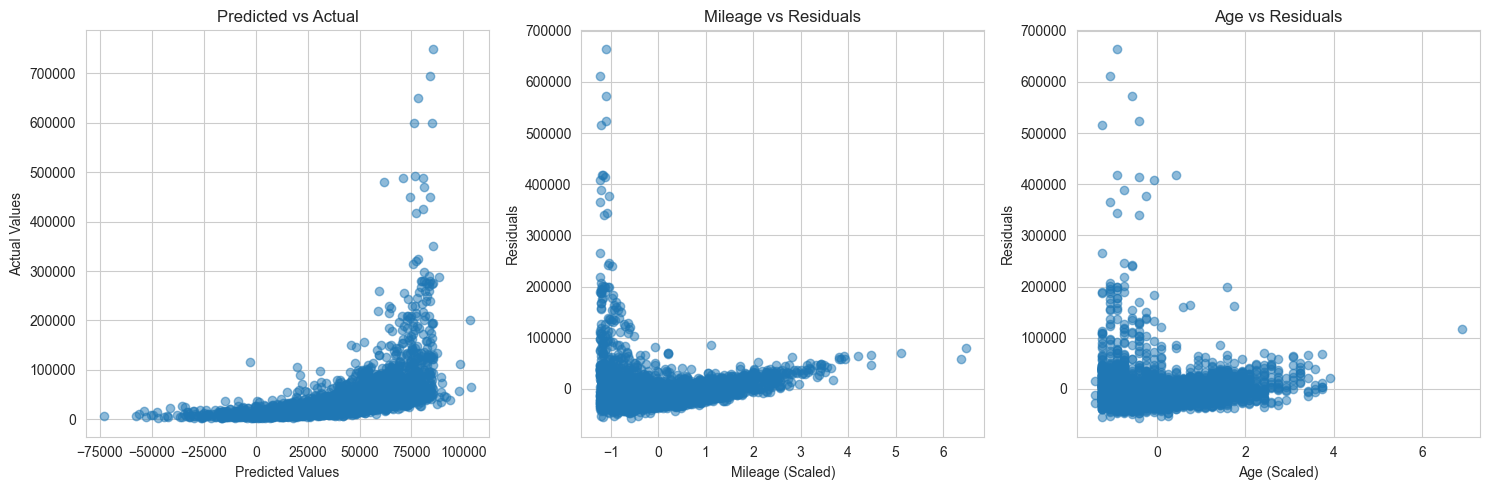


2. Independence Assumption:
Durbin-Watson Statistic: 2.00868769310419
Rule of thumb:
- Close to 2: No autocorrelation
- < 1 or > 3: Potential autocorrelation


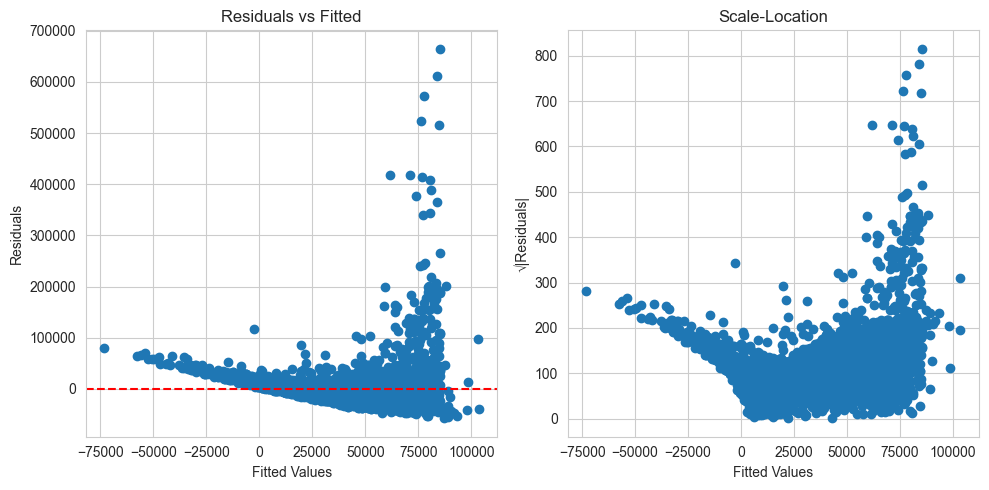


3. Equal Variance Assumption:
Levene's Test p-value: 2.3193183821132916e-26
p > 0.05 suggests homoscedasticity


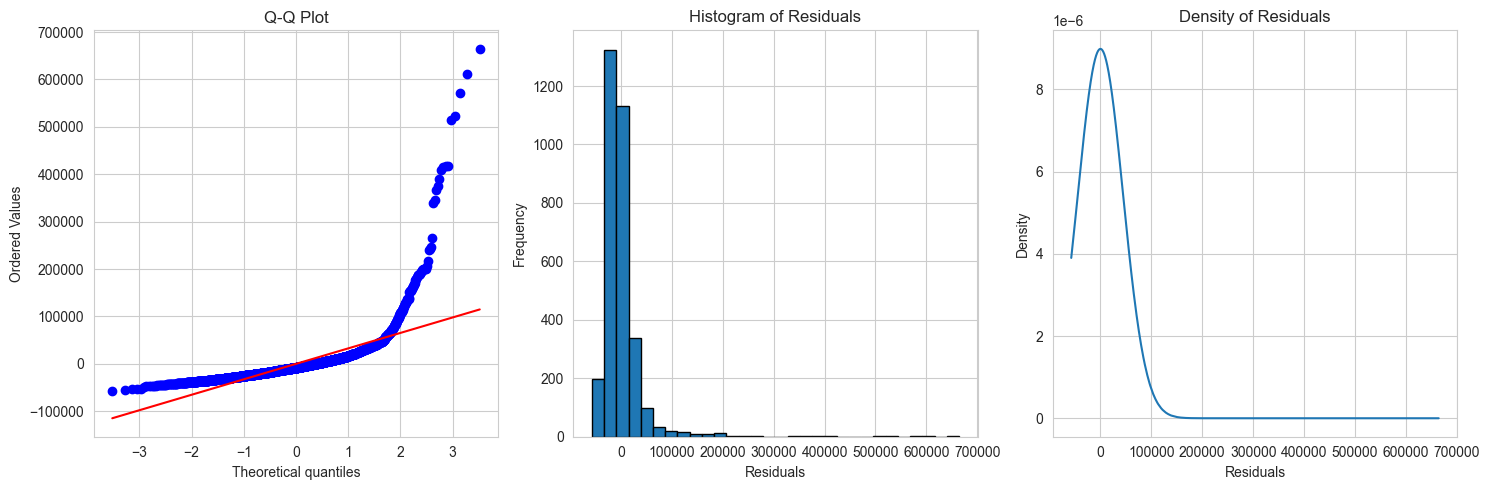


4. Normality Assumption:
Shapiro-Wilk Test p-value: 3.7447554273649086e-68
p > 0.05 suggests normality

5. Multicollinearity:
    Feature       VIF
0   mileage  1.669561
1  accident  1.059975
2       age  1.615020


C:\Users\frlin\AppData\Local\Temp\ipykernel_27828\3035403790.py:144: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(z_scores_X, vert=False, labels=X_numeric.columns)


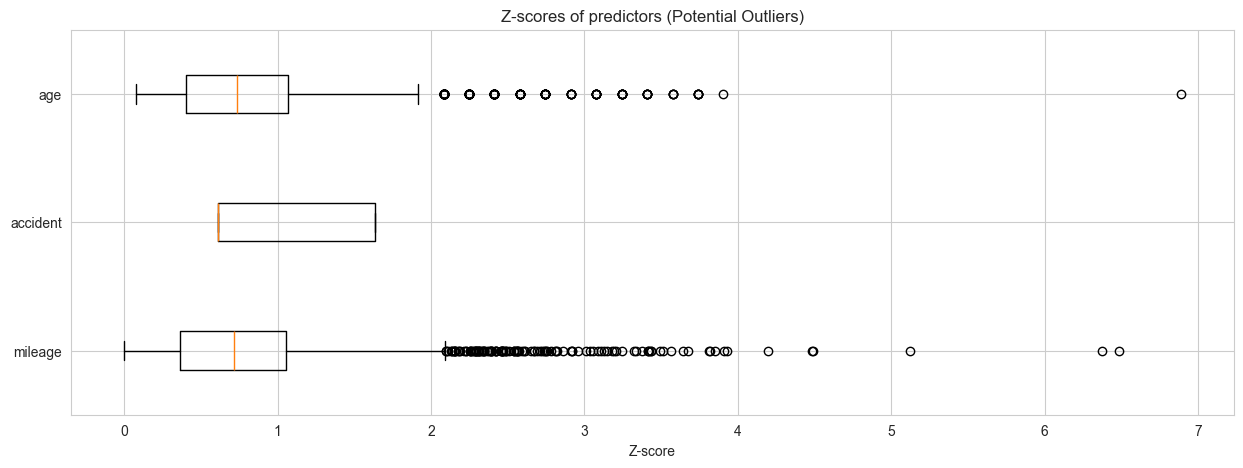


6. Outliers (Z-score > 3):
mileage     35
accident     0
age         33
dtype: int64


In [132]:


from statsmodels.stats.stattools import durbin_watson


# 1. Linearity Assumption Validation
def validate_linearity(X_train, y, y_pred, residuals):
    plt.figure(figsize=(15, 5))

    # Scatter plot of predicted vs actual values
    plt.subplot(131)
    plt.scatter(y_pred, y, alpha=0.5)
    plt.title('Predicted vs Actual')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')

    # Partial regression plots for numeric features
    plt.subplot(132)
    plt.scatter(X_train['mileage'], residuals, alpha=0.5)
    plt.title('Mileage vs Residuals')
    plt.xlabel('Mileage (Scaled)')
    plt.ylabel('Residuals')

    plt.subplot(133)
    plt.scatter(X_train['age'], residuals, alpha=0.5)
    plt.title('Age vs Residuals')
    plt.xlabel('Age (Scaled)')
    plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()


# 2. Independence Assumption Validation
def validate_independence(residuals):
    dw_statistic = durbin_watson(residuals)
    print("\n2. Independence Assumption:")
    print(f"Durbin-Watson Statistic: {dw_statistic}")
    print("Rule of thumb:")
    print("- Close to 2: No autocorrelation")
    print("- < 1 or > 3: Potential autocorrelation")


# 3. Equal Variance Assumption (Homoscedasticity)
def validate_homoscedasticity(y_pred, residuals):
    plt.figure(figsize=(10, 5))

    # Residuals vs Fitted plot
    plt.subplot(121)
    plt.scatter(y_pred, residuals)
    plt.title('Residuals vs Fitted')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')

    # Scale-Location plot
    plt.subplot(122)
    plt.scatter(y_pred, np.sqrt(np.abs(residuals)))
    plt.title('Scale-Location')
    plt.xlabel('Fitted Values')
    plt.ylabel('√|Residuals|')

    plt.tight_layout()
    plt.show()

    # Levene’s test
    group1 = residuals[y_pred <= np.median(y_pred)]
    group2 = residuals[y_pred > np.median(y_pred)]
    _, p_value = stats.levene(group1, group2)

    print("\n3. Equal Variance Assumption:")
    print(f"Levene's Test p-value: {p_value}")
    print("p > 0.05 suggests homoscedasticity")


# 4. Normality Assumption
def validate_normality(residuals):
    plt.figure(figsize=(15, 5))

    # Q-Q Plot
    plt.subplot(131)
    stats.probplot(residuals, plot=plt)
    plt.title('Q-Q Plot')

    # Histogram of Residuals
    plt.subplot(132)
    plt.hist(residuals, bins=30, edgecolor='black')
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # Kernel Density Estimation
    plt.subplot(133)
    residuals_sorted = np.sort(residuals)
    plt.plot(residuals_sorted, stats.norm.pdf(residuals_sorted, np.mean(residuals), np.std(residuals)))
    plt.title('Density of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

    # Shapiro-Wilk Test
    _, shapiro_p = stats.shapiro(residuals)
    print("\n4. Normality Assumption:")
    print(f"Shapiro-Wilk Test p-value: {shapiro_p}")
    print("p > 0.05 suggests normality")


# 5. Multicollinearity
def validate_multicollinearity(X_train):
    # Make a copy and ensure it's all numeric
    X_vif = X_train.copy()
    X_vif = X_vif.select_dtypes(include=[np.number])  # Remove non-numeric columns

    # Drop columns with NA or inf
    X_vif = X_vif.replace([np.inf, -np.inf], np.nan).dropna()

    # Re-check if there are still columns left
    if X_vif.shape[1] == 0:
        print("No valid numeric predictors found for VIF calculation.")
        return

    # Calculate VIF
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_vif.columns
    vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

    print("\n5. Multicollinearity:")
    print(vif_data)


# 6. Outliers
def validate_outliers(X_train, y_train):
    # Only use numeric columns
    X_numeric = X_train.select_dtypes(include=[np.number])

    # Calculate Z-scores
    z_scores_X = np.abs(stats.zscore(X_numeric, nan_policy='omit'))
    z_scores_y = np.abs(stats.zscore(y_train, nan_policy='omit'))

    # Plotting for example (optional)
    plt.figure(figsize=(15, 5))
    plt.boxplot(z_scores_X, vert=False, labels=X_numeric.columns)
    plt.title("Z-scores of predictors (Potential Outliers)")
    plt.xlabel("Z-score")
    plt.show()

    print("\n6. Outliers (Z-score > 3):")
    outliers_X = (z_scores_X > 3).sum(axis=0)
    print(pd.Series(outliers_X, index=X_numeric.columns))


# ================================
# Example of calling the validators
# ================================

# Example:
# model = LinearRegression().fit(X_train, y_train)
# y_pred = model.predict(X_train)
# residuals = y_train - y_pred

print("Linear Regression Assumptions Validation:")

validate_linearity(X_train, y_train, y_pred, residuals)
validate_independence(residuals)
validate_homoscedasticity(y_pred, residuals)
validate_normality(residuals)
validate_multicollinearity(X_train)
validate_outliers(X_train, y_train)


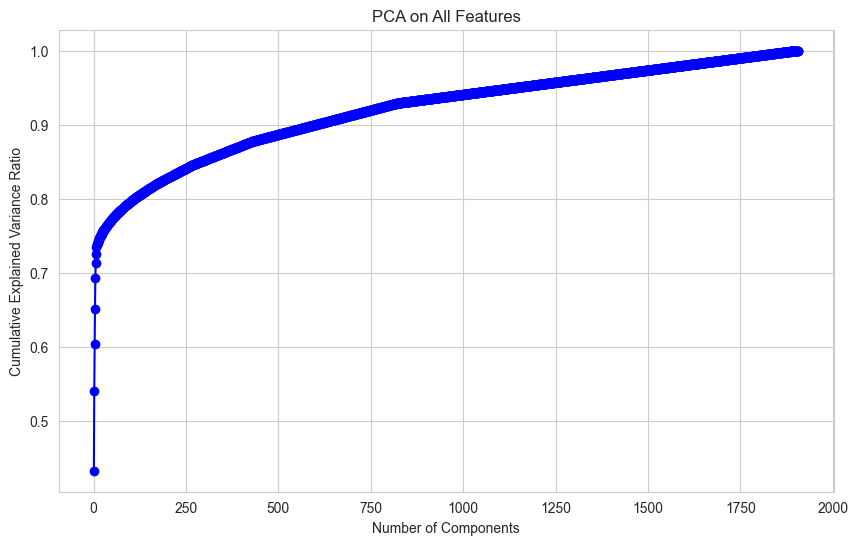


Top component loadings:
                               PC1       PC2
mileage                   0.701252 -0.658063
age                       0.699656  0.677688
model_128 i               0.000042  0.000245
model_135 i               0.000496  0.000803
model_135 is             -0.000030  0.000632
...                            ...       ...
fuel_type_Plug-In Hybrid -0.004832 -0.003064
fuel_type_electric       -0.030900 -0.013423
accident_1                0.100535 -0.120929
luxury_brand_1           -0.057918  0.213857
automatic_transmission_1 -0.039368 -0.150111

[1907 rows x 2 columns]


In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Define feature types
numerical_features = ['mileage', 'age']
categorical_features = ['model', 'fuel_type', 'accident', 'luxury_brand', 'automatic_transmission']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Fit and transform the data
X = used_cars_data[numerical_features + categorical_features]
X_transformed = preprocessor.fit_transform(X)

# Get feature names after encoding
onehot_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numerical_features, onehot_features])

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_transformed)

# Plot explained variance
plt.figure(figsize=(10, 6))
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA on All Features')
plt.grid(True)
plt.show()

# Print component loadings
n_components = 2
loadings = pd.DataFrame(
    pca.components_[:n_components].T,
    columns=[f'PC{i + 1}' for i in range(n_components)],
    index=feature_names
)
print("\nTop component loadings:")
print(loadings)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
import numpy as np

# Get transformed features from PCA
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
X_pca_selected = X_pca[:, :n_components]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_pca_selected,
    used_cars_data['price'],
    test_size=0.2,
    random_state=42
)

# Fit linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate standard errors and p-values
n = X_train.shape[0]
p = X_train.shape[1]
dof = n - p - 1
y_pred_train = lr_model.predict(X_train)
mse = np.sum((y_train - y_pred_train) ** 2) / dof

# Add small constant to prevent division by zero
eps = 1e-10
X_train_pinv = np.linalg.pinv(X_train.T @ X_train)
var_coef = mse * (X_train_pinv.diagonal() + eps)
t_stats = lr_model.coef_ / np.sqrt(np.abs(var_coef))
p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), dof))

print(f"Number of components used: {n_components}")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: ${rmse:,.2f}\n")

Number of components used: 1138
R² Score: -32412.694
RMSE: $25,739,502.60



In [35]:
print("Component statistics:")
for i in range(n_components):
    print(f"PC{i + 1}:")
    print(f"  Coefficient: {lr_model.coef_[i]:,.3f}")
    print(f"  t-statistic: {t_stats[i]:.3f}")
    print(f"  p-value: {p_values[i]:.3e}")

Component statistics:
PC1:
  Coefficient: -16,489.989
  t-statistic: -17.878
  p-value: 0.000e+00
PC2:
  Coefficient: 11,520.270
  t-statistic: 8.259
  p-value: 2.220e-16
PC3:
  Coefficient: 15,224.097
  t-statistic: 7.813
  p-value: 7.994e-15
PC4:
  Coefficient: -1,421.481
  t-statistic: -0.708
  p-value: 4.789e-01
PC5:
  Coefficient: 4,433.718
  t-statistic: 1.519
  p-value: 1.288e-01
PC6:
  Coefficient: -3,666.435
  t-statistic: -1.234
  p-value: 2.173e-01
PC7:
  Coefficient: -3,274.309
  t-statistic: -0.496
  p-value: 6.198e-01
PC8:
  Coefficient: 12,652.301
  t-statistic: 2.545
  p-value: 1.097e-02
PC9:
  Coefficient: 11,303.212
  t-statistic: 1.795
  p-value: 7.270e-02
PC10:
  Coefficient: -6,602.401
  t-statistic: -0.849
  p-value: 3.961e-01
PC11:
  Coefficient: -9,222.802
  t-statistic: -1.029
  p-value: 3.034e-01
PC12:
  Coefficient: -16,353.489
  t-statistic: -1.799
  p-value: 7.221e-02
PC13:
  Coefficient: -53,691.412
  t-statistic: -5.890
  p-value: 4.359e-09
PC14:
  Coeffi

In [41]:

from scipy import stats


def fast_multicollinearity_test(X):
    # Convert to numpy array if not already
    X = np.asarray(X)

    # Calculate correlation matrix using optimized numpy operations
    corr_matrix = np.corrcoef(X.T)

    # Get upper triangle indices
    upper_tri = np.triu_indices(corr_matrix.shape[0], k=1)

    # Extract correlations and find high correlations
    correlations = corr_matrix[upper_tri]
    high_corr = np.abs(correlations) > 0.7

    # Calculate VIF (Variance Inflation Factor) for each feature
    vif = np.zeros(X.shape[1])
    for i in range(X.shape[1]):
        vif[i] = 1 / (1 - np.square(corr_matrix[i]).sum())

    return {
        'high_correlations': np.sum(high_corr),
        'max_correlation': np.max(np.abs(correlations)),
        'mean_vif': np.mean(vif)
    }


# Now run the multicollinearity test
results = fast_multicollinearity_test(X_transformed)
print(f"Number of high correlations (>0.7): {results['high_correlations']}")
print(f"Maximum correlation coefficient: {results['max_correlation']:.3f}")
print(f"Mean VIF score: {results['mean_vif']:.3f}")

Number of high correlations (>0.7): 0
Maximum correlation coefficient: 0.618
Mean VIF score: -505.777


In [42]:
def calculate_vif(X, max_iter=50):
    # If X is a numpy array, convert to DataFrame with generic feature names
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])

    # Initialize VIF DataFrame
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # Calculate VIF with error handling
    vifs = []
    for i in range(X.shape[1]):
        try:
            # Extract target column and remaining columns
            y = X.iloc[:, i]
            X_other = X.drop(X.columns[i], axis=1)

            # Add constant
            X_other = sm.add_constant(X_other)

            # Fit regression
            model = sm.OLS(y, X_other, max_iter=max_iter).fit()

            # Calculate VIF
            r2 = model.rsquared
            vif = 1 / (1 - r2)
            vifs.append(vif)
        except:
            vifs.append(np.inf)  # Mark failed calculations as infinite VIF

    vif_data["VIF"] = vifs
    return vif_data.sort_values('VIF', ascending=False)


# Try with a subset of features first
n_features = 100  # Start with fewer features
X_subset = X_transformed[:, :n_features]

# Calculate VIF
vif_results = calculate_vif(X_subset)
print(vif_results.head(10))  # Show top 10 VIF scores

     feature  VIF
0  Feature_0  inf
1  Feature_1  inf
2  Feature_2  inf
3  Feature_3  inf
4  Feature_4  inf
5  Feature_5  inf
6  Feature_6  inf
7  Feature_7  inf
8  Feature_8  inf
9  Feature_9  inf


In [43]:
def calculate_vif_stepwise(X, threshold=10.0):
    """
    Calculate VIF values and iteratively remove features with highest VIF until all are below threshold
    """
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])

    variables = list(range(X.shape[1]))
    dropped = []

    while True:
        vif_data = []
        for idx in variables:
            others = [i for i in variables if i != idx]
            if len(others) > 0:  # Skip if this is the last variable
                try:
                    r_squared = sm.OLS(
                        X.iloc[:, idx],
                        sm.add_constant(X.iloc[:, others])
                    ).fit().rsquared
                    vif = 1 / (1 - r_squared) if r_squared < 1 else float('inf')
                except:
                    vif = float('inf')
            else:
                vif = 1.0
            vif_data.append((idx, vif))

        max_vif = max(vif_data, key=lambda x: x[1])
        if max_vif[1] > threshold:
            dropped.append(max_vif[0])
            variables.remove(max_vif[0])
        else:
            break

        if len(variables) < 2:  # Stop if only one variable remains
            break

    return {
        'kept_features': variables,
        'dropped_features': dropped
    }


# Apply stepwise VIF reduction
results = calculate_vif_stepwise(X_transformed, threshold=10.0)
print(f"Features kept: {len(results['kept_features'])}")
print(f"Features dropped: {len(results['dropped_features'])}")

# Get final dataset with selected features
X_final = pd.DataFrame(X_transformed[:, results['kept_features']])

Features kept: 1
Features dropped: 1906


In [39]:
X_final

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
4004,1.0
4005,1.0
4006,1.0
4007,1.0


In [38]:



def calculate_stable_vif(X):
    """Calculate VIF using more stable method"""
    # Standardize features
    X_scaled = StandardScaler().fit_transform(X)
    n_features = X_scaled.shape[1]

    vif_dict = {}

    # Calculate VIF for each feature
    for i in range(n_features):
        # Select all columns except the current one
        X_other = np.delete(X_scaled, i, axis=1)
        # Current column
        y = X_scaled[:, i]

        # Fit linear regression
        r2 = LinearRegression().fit(X_other, y).score(X_other, y)

        # Calculate VIF
        vif = 1 / (1 - r2) if r2 < 0.999 else np.nan
        vif_dict[f'PC{i + 1}'] = vif

    # Create DataFrame
    vif_df = pd.DataFrame({
        'Feature': vif_dict.keys(),
        'VIF': vif_dict.values()
    }).dropna()

    return vif_df.sort_values('VIF', ascending=False)


# Calculate VIF
vif_results = calculate_stable_vif(X_pca_selected)
print("Variance Inflation Factors:")
print(vif_results)

KeyboardInterrupt: 

In [125]:
import pandas as pd

# Create dummy variables for categorical columns (drop the first column to avoid multicollinearity)
df_dummies_brand = pd.get_dummies(used_cars_data['brand'], drop_first=True)
df_dummies_luxury_brand = pd.get_dummies(used_cars_data['luxury_brand'], drop_first=True)
df_dummies_model = pd.get_dummies(used_cars_data['model'], drop_first=True)
df_dummies_fuel_type = pd.get_dummies(used_cars_data['fuel_type'], drop_first=True)
df_dummies_engine = pd.get_dummies(used_cars_data['engine'], drop_first=True)
df_dummies_transmission = pd.get_dummies(used_cars_data['transmission'], drop_first=True)
df_dummies_ext_color = pd.get_dummies(used_cars_data['ext_col'], drop_first=True)
df_dummies_int_color = pd.get_dummies(used_cars_data['int_col'], drop_first=True)
df_dummies_accident = pd.get_dummies(used_cars_data['accident'], drop_first=True)
df_dummies_clean_title = pd.get_dummies(used_cars_data['clean_title'], drop_first=True)
df_dummies_automatic_transmission = pd.get_dummies(used_cars_data['automatic_transmission'], drop_first=True)

# Combine the dummy variables with the original numerical features
df_full = pd.concat([
    df_dummies_luxury_brand,
    df_dummies_model,
    df_dummies_fuel_type,
    df_dummies_engine,
    df_dummies_automatic_transmission,
    df_dummies_accident,
    used_cars_data[['mileage', 'model_year', 'price']]
], axis=1)

In [126]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Ensure that the column names are strings
df_full.columns = df_full.columns.astype(str)

# Standardize the data (center and scale)
scaler = StandardScaler()
df_full_scaled = scaler.fit_transform(df_full)

# Perform PCA on the combined dummy variables and numerical features
pca = PCA()
pca_result = pca.fit_transform(df_full_scaled)

# Calculate explained variance and determine number of components explaining 90% of variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Set the threshold for the variance to keep, e.g., 90%
threshold = 0.90
n_components = np.argmax(
    cumulative_variance >= threshold) + 1  # +1 to get the first component that exceeds the threshold

# Select the first n_components from the PCA result
selected_components = pca_result[:, :n_components]

# Create a DataFrame with the selected components and the target variable 'price'
df_pca = pd.DataFrame(selected_components, columns=[f'PC{i + 1}' for i in range(n_components)])
df_pca['price'] = used_cars_data['price']

# Fit a linear regression model using the selected components
X = sm.add_constant(df_pca.drop(columns='price'))  # Adds constant (intercept)
y = df_pca['price']
lm_pca = sm.OLS(y, X).fit()

# Summarize the model
lm_pca_summary = lm_pca.summary()

# Print the summary
print(lm_pca_summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     8.196
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        09:54:44   Log-Likelihood:                -46693.
No. Observations:                4009   AIC:                         9.711e+04
Df Residuals:                    2149   BIC:                         1.088e+05
Df Model:                        1859                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.455e+04    596.887     74.643      0.0

In [127]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

# Assuming 'used_cars_data' is your DataFrame
X = used_cars_data.drop(columns=['price'])  # Assuming 'price' is your target variable

# Step 1: Handle categorical variables
categorical_columns = X.select_dtypes(include=['object']).columns  # Identify categorical columns

# If any categorical columns exist, perform one-hot encoding
if len(categorical_columns) > 0:
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    X_encoded = encoder.fit_transform(X[categorical_columns])

    # Convert the encoded columns back to a DataFrame
    X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_columns))

    # Drop original categorical columns and concatenate the encoded features
    X = X.drop(columns=categorical_columns).reset_index(drop=True)
    X = pd.concat([X, X_encoded_df], axis=1)

# Step 2: Handle NaN or infinite values
X = X.replace([np.inf, -np.inf], np.nan)  # Replace inf values with NaN
X = X.dropna()  # Drop rows with NaN values

# Step 3: Ensure the DataFrame contains only numeric columns
X = X.select_dtypes(include=[np.number])  # Select only numeric columns

# Step 4: Perform PCA to reduce multicollinearity if needed
pca = PCA(n_components=0.90)  # Retain components explaining 90% variance
X_pca = pca.fit_transform(X)

# Step 5: Check PCA result
print("Shape of the PCA-transformed data:", X_pca.shape)

# Step 6: Optionally, fit a linear regression model with PCA-transformed data
from sklearn.linear_model import LinearRegression

df_pca = pd.DataFrame(X_pca, columns=[f"PC{i + 1}" for i in range(X_pca.shape[1])])
df_pca['price'] = used_cars_data['price']  # Add the target variable 'price' to the PCA DataFrame

lm_pca = LinearRegression()
lm_pca.fit(df_pca.drop(columns=['price']), df_pca['price'])

# Print the coefficients and intercept
print("Linear Regression Coefficients:", lm_pca.coef_)
print("Linear Regression Intercept:", lm_pca.intercept_)

# Calculate R-squared
r_squared = lm_pca.score(df_pca.drop(columns=['price']), df_pca['price'])
print(f"R-squared for the model: {r_squared:.4f}")


Shape of the PCA-transformed data: (3229, 1)
Linear Regression Coefficients: [-0.01825321]
Linear Regression Intercept: 45422.102198823166
R-squared for the model: 0.0001


In [128]:
import statsmodels.api as sm

# Perform PCA as before
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X)

# Prepare the PCA-transformed data
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i + 1}" for i in range(X_pca.shape[1])])
df_pca['price'] = used_cars_data['price']

# Add a constant for the intercept
X_sm = sm.add_constant(df_pca.drop(columns=['price']))

# Fit the model using statsmodels
model = sm.OLS(df_pca['price'], X_sm).fit()

# Print the summary
print(model.summary())

# Extract significant predictors (p-value < 0.05)
pca_significant_predictors = model.pvalues[model.pvalues < 0.05].index.tolist()

# Print the significant predictors
print("Significant predictors:", pca_significant_predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4269
Date:                Thu, 27 Mar 2025   Prob (F-statistic):              0.514
Time:                        09:54:45   Log-Likelihood:                -41213.
No. Observations:                3229   AIC:                         8.243e+04
Df Residuals:                    3227   BIC:                         8.244e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.542e+04   1487.301     30.540      0.0

In [129]:
# Create a new DataFrame with only the significant predictors
# Assuming df_pca contains the PCA-transformed dataset

# Remove "(Intercept)" from the list of significant predictors
pca_sign_no_intercept = [col for col in pca_significant_predictors if col != 'const']

# Create a new DataFrame with the significant predictors
pca_significant_df = df_pca[pca_sign_no_intercept].copy()  # Ensure it's a copy

# Add the dependent variable (response) to the new DataFrame if needed
pca_significant_df.loc[:, 'price'] = df_pca['price']

In [130]:
import statsmodels.api as sm

# Create the formula for the significant predictors (excluding intercept)
pca_significant_predictors_no_intercept = [col for col in pca_significant_predictors if col != 'const']
formula = 'price ~ ' + ' + '.join(pca_significant_predictors_no_intercept)

# Prepare the data for fitting the model
X = pca_significant_df[pca_significant_predictors_no_intercept]  # Select significant predictors
X = sm.add_constant(X)  # Add constant to the predictors (intercept term)
y = pca_significant_df['price']  # Dependent variable

# Fit the linear model
lm_pca_significant = sm.OLS(y, X).fit()

# Get the summary of the model
lm_pca_significant_summary = lm_pca_significant.summary()
print(lm_pca_significant_summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 27 Mar 2025   Prob (F-statistic):                nan
Time:                        09:54:45   Log-Likelihood:                -41213.
No. Observations:                3229   AIC:                         8.243e+04
Df Residuals:                    3228   BIC:                         8.243e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.542e+04   1487.169     30.543      0.0

In [131]:
import statsmodels.api as sm


# Define a function for stepwise selection
def stepwise_selection(X, y, threshold_in=0.05, threshold_out=0.05):
    initial_features = X.columns
    included = list(initial_features)
    while True:
        changed = False
        # Step 1: Check p-values and remove features with p-value > threshold_out
        model = sm.OLS(y, sm.add_constant(X[included])).fit()
        p_values = model.pvalues.iloc[1:]  # exclude intercept
        worst_pval = p_values.max()  # get the feature with the highest p-value
        if worst_pval > threshold_out:
            worst_feature = p_values.idxmax()
            included.remove(worst_feature)
            changed = True
        # Step 2: Add features with p-value < threshold_in
        for feature in initial_features:
            if feature not in included:
                temp_features = included + [feature]
                model = sm.OLS(y, sm.add_constant(X[temp_features])).fit()
                p_values = model.pvalues.iloc[1:]
                if p_values[feature] < threshold_in:
                    included.append(feature)
                    changed = True
        if not changed:
            break
    return sm.OLS(y, sm.add_constant(X[included])).fit()


# Prepare the data
X = pca_significant_df[pca_significant_predictors_no_intercept]  # Select significant predictors
X = sm.add_constant(X)  # Add constant to the predictors
y = pca_significant_df['price']  # Dependent variable

# Perform stepwise selection
stepwise_model = stepwise_selection(X, y)

# Get the summary of the stepwise regression model
stepwise_model_summary = stepwise_model.summary()
print(stepwise_model_summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 27 Mar 2025   Prob (F-statistic):                nan
Time:                        09:54:46   Log-Likelihood:                -41213.
No. Observations:                3229   AIC:                         8.243e+04
Df Residuals:                    3228   BIC:                         8.243e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.542e+04   1487.169     30.543      0.0

In [132]:
# Extract coefficient names from the stepwise model (excluding intercept)
coef_names = stepwise_model.params.index.tolist()
coef_names.remove('const')  # Remove intercept if present

# 2. Subset your existing DataFrame by these predictor names
pca_additive_final_df = pca_significant_df[coef_names]
pca_additive_final_df['price'] = pca_significant_df['price']  # Add the dependent variable

# Create formula string (assuming 'price' is the response variable)
formula_string = 'price ~ ' + ' + '.join(coef_names)

# Fit the linear model using the formula
X = pca_additive_final_df[coef_names]
X = sm.add_constant(X)  # Add constant to the predictors
y = pca_additive_final_df['price']  # Dependent variable
pca_additive_final_lm = sm.OLS(y, X).fit()

# Print the summary of the final model
print(pca_additive_final_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 27 Mar 2025   Prob (F-statistic):                nan
Time:                        09:54:46   Log-Likelihood:                -41213.
No. Observations:                3229   AIC:                         8.243e+04
Df Residuals:                    3228   BIC:                         8.243e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.542e+04   1487.169     30.543      0.0

In [141]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


def calculate_vif(X):
    """
    Calculate Variance Inflation Factor (VIF) for a DataFrame

    Parameters:
    X (pandas.DataFrame): DataFrame of independent variables

    Returns:
    pandas.Series: VIF values for each variable
    """
    # Ensure X is a DataFrame
    if not isinstance(X, pd.DataFrame):
        try:
            X = pd.DataFrame(X)
        except:
            raise TypeError("Input must be convertible to a pandas DataFrame")

    # Select only numeric columns
    X_numeric = X.select_dtypes(include=[np.number])

    # Add a constant term for the intercept
    X_with_constant = sm.add_constant(X_numeric)

    # Calculate VIF for each variable
    vif_data = pd.Series([
        variance_inflation_factor(X_with_constant.values, i)
        for i in range(1, X_with_constant.shape[1])
    ], index=X_numeric.columns)

    return vif_data

# Example usage:
# Assuming you have a DataFrame X with your predictors
# lm_pca_significant_vif = calculate_vif(X)

In [143]:
calculate_vif(pca_additive_final_lm)

TypeError: Input must be convertible to a pandas DataFrame

In [150]:
import statsmodels.api as sm


def find_significant_interactions(coefficients):
    coef_df = pd.DataFrame(coefficients, columns=['Estimate', 'StdError', 'tValue', 'pValue'])
    coef_df['Term'] = coef_df.index
    significant_interactions = coef_df[coef_df['pValue'] < 0.05 & coef_df['Term'].str.contains(':')]
    return significant_interactions['Term'].tolist()


def best_interaction_formula(additive_predictors, df, target_var):
    coef_names = df.columns.tolist()
    full_int_formula = f"{target_var} ~ ({' + '.join(coef_names)})**2"

    # Fit the model
    full_int_lm = sm.OLS.from_formula(full_int_formula, data=df).fit()
    lm_summary = full_int_lm.summary2().tables[1]

    while True:
        significant_interactions_current = find_significant_interactions(lm_summary)
        n_significant_interactions_current = len(significant_interactions_current)
        print(f"current: {n_significant_interactions_current}")

        # Replace ":" with "*" in each element
        terms_modified = [term.replace(":", "*") for term in significant_interactions_current]

        int_formula_new = f"{target_var} ~ {' + '.join(additive_predictors)} + {' + '.join(terms_modified)}"

        # Fit the new model
        int_formula_new_lm = sm.OLS.from_formula(int_formula_new, data=df).fit()
        lm_summary_new = int_formula_new_lm.summary2().tables[1]

        significant_interactions_new = find_significant_interactions(lm_summary_new)
        n_significant_interactions_new = len(significant_interactions_new)
        print(f"new: {n_significant_interactions_new}")

        if n_significant_interactions_new == n_significant_interactions_current:
            return int_formula_new


# Assuming df is your DataFrame and target_var is "price"
best_int_formula = best_interaction_formula(coef_names, pca_additive_final_df, "price")

# Fit the best interaction model
best_int_lm = sm.OLS.from_formula(best_int_formula, data=pca_additive_final_df).fit()

# Get the summary
best_int_lm_summary = best_int_lm.summary()


Error in iteration 0: expected a noun, but instead the expression ended
    price ~
          ^


PatsyError: expected a noun, but instead the expression ended
    price ~
          ^

In [151]:
import statsmodels.api as sm
import pandas as pd
import numpy as np


def find_significant_interactions(coefficients):
    coef_df = pd.DataFrame(coefficients, columns=['Estimate', 'StdError', 'tValue', 'pValue'])
    coef_df['Term'] = coef_df.index
    significant_interactions = coef_df[coef_df['pValue'] < 0.05 & coef_df['Term'].str.contains(':')]
    return significant_interactions['Term'].tolist()


def best_interaction_formula(additive_predictors, df, target_var):
    coef_names = df.columns.tolist()
    full_int_formula = f"{target_var} ~ ({' + '.join(coef_names)})**2"

    # Fit the model
    full_int_lm = sm.OLS.from_formula(full_int_formula, data=df).fit()
    lm_summary = full_int_lm.summary2().tables[1]

    while True:
        significant_interactions_current = find_significant_interactions(lm_summary)
        n_significant_interactions_current = len(significant_interactions_current)
        print(f"current: {n_significant_interactions_current}")

        # Replace ":" with "*" in each element
        terms_modified = [term.replace(":", "*") for term in significant_interactions_current]

        int_formula_new = f"{target_var} ~ {' + '.join(additive_predictors)} + {' + '.join(terms_modified)}"

        # Fit the new model
        int_formula_new_lm = sm.OLS.from_formula(int_formula_new, data=df).fit()
        lm_summary_new = int_formula_new_lm.summary2().tables[1]

        significant_interactions_new = find_significant_interactions(lm_summary_new)
        n_significant_interactions_new = len(significant_interactions_new)
        print(f"new: {n_significant_interactions_new}")

        if n_significant_interactions_new == n_significant_interactions_current:
            return int_formula_new


# Assuming df is your DataFrame and target_var is "price"
best_int_formula = best_interaction_formula(coef_names, pca_additive_final_df, "price")

# Fit the best interaction model
best_int_lm = sm.OLS.from_formula(best_int_formula, data=pca_additive_final_df).fit()

# Get the summary
best_int_lm_summary = best_int_lm.summary()

TypeError: Cannot perform 'rand_' with a dtyped [bool] array and scalar of type [bool]